# entrevistas

In [17]:
import pandas as pd

# Archivos Excel de entrada
archivos_excel = [
    './data/interview/Leonidas Iza.xlsx',
    './data/interview/HenryKronfle.xlsx',
    './data/interview/Luis Tilleria.xlsx'
]

# Convertir cada archivo Excel a CSV con ,
for archivo_excel in archivos_excel:
    # Leer el archivo Excel
    df = pd.read_excel(archivo_excel)
    
    # Definir el archivo CSV de salida
    archivo_csv = archivo_excel.replace('.xlsx', '.csv')  # Reemplaza la extensión .xlsx por .csv
    
    # Guardar como archivo CSV con ,
    df.to_csv(archivo_csv, index=False, sep=',')  # Usamos tabulación como separador
    
    print(f"Archivo convertido a CSV con ,: {archivo_csv}")


Archivo convertido a CSV con ,: ./data/interview/Leonidas Iza.csv
Archivo convertido a CSV con ,: ./data/interview/HenryKronfle.csv
Archivo convertido a CSV con ,: ./data/interview/Luis Tilleria.csv


In [22]:
import pandas as pd
import re
import ollama  # Asegúrate de tener instalada la librería con: pip install ollama

# Lista de temas relevantes
temas_relevantes = { 
    "economía", "educación", "salud", "seguridad", "empleo",
    "infraestructura", "corrupción", "tecnología", "ambiente",
    "justicia", "transporte", "política", "desarrollo", "energía",
    "derechos humanos", "igualdad", "innovación", "turismo",
    "agricultura", "cultura", "deporte", "finanzas", "inversión",
    "vivienda", "servicios públicos", "ciencia", "medio ambiente",
    "gobierno", "industria", "exportaciones", "importaciones",
    "educación superior", "sanidad", "movilidad", "inteligencia artificial",
    "seguridad ciudadana", "crimen organizado", "democracia", "pobreza",
    "sostenibilidad", "digitalización", "gestión pública", "comercio",
    "cambio climático", "energías renovables", "transparencia", "ciberseguridad",
    "salud pública", "gobernanza", "justicia social", "igualdad de género",
    "emprendimiento", "industria 4.0", "desarrollo sostenible", "desastres naturales",
    "reforestación", "movilidad urbana", "biodiversidad", "educación financiera",
    "trabajo remoto", "accesibilidad", "industria alimentaria", "industria tecnológica",
    "educación digital", "cultura digital", "sociedad del conocimiento", 
    "banca digital", "teletrabajo", "inteligencia colectiva", "biotecnología",
    "blockchain", "fintech", "medicina personalizada", "economía circular",
    "ciudades inteligentes", "protección de datos", "energía solar", "transporte eléctrico",
    "robotización", "computación cuántica", "espacio exterior", "protección ambiental",
    "seguridad en la nube", "movilidad eléctrica", "alimentos orgánicos", "tecnología educativa",
    "agtech", "neurociencia", "edtech", "deep learning", "big data", "sistemas autónomos",
    "tecnología espacial", "cambio de paradigma", "smart grids", "ciudades sostenibles", 
    "ecoeficiencia", "energía eólica", "tecnologías disruptivas", "energía geotérmica",
    "nanotecnología", "microbioma", "bioeconomía", "ecoturismo", "industrias creativas",
    "gobernanza digital", "energía limpia", "criptomonedas", "minería digital", "ciencias marinas",
    "nanomateriales", "inteligencia emocional", "finanzas sostenibles", "educación en línea",
    "bio", "ecoinnovación", "simulación computacional", "agricultura urbana", "cultivos inteligentes","IESS"
}

# 📌 Función para extraer los temas tratados
def extraer_temas(texto):
    # Aseguramos que el texto no sea vacío o nulo
    if not texto or not isinstance(texto, str):
        return "Otros"
    
    # Convertimos el texto a minúsculas y buscamos los temas
    texto = texto.lower()
    temas_detectados = [tema for tema in temas_relevantes if tema.lower() in texto]
    
    # Si encontramos temas, los unimos en una cadena separada por comas
    return ", ".join(temas_detectados) if temas_detectados else "Otros"

# 📌 Función para generar resúmenes con Ollama
def generar_resumen_ollama(texto):
    prompt = f"Resume el siguiente texto en un parrafo:\n\n{texto}"

    try:
        respuesta = ollama.chat(
            model="llama3.2:latest",
            messages=[{"role": "user", "content": prompt}]
        )
        resumen = respuesta.get("message", {}).get("content", "").strip()
        # Eliminar saltos de línea y espacios extras
        resumen = ' '.join(resumen.split())
        return resumen if resumen else "No se pudo generar el resumen"

    except Exception as e:
        print(f"❌ Error con Ollama: {e}")
        return "Resumen no disponible"

def procesar_csv(archivo_entrada, archivo_salida):
    df = pd.read_csv(archivo_entrada,sep=",")

    # Verifica si la columna "entrevista" existe en el archivo CSV
    if "entrevista" not in df.columns:
        print("❌ La columna 'entrevista' no se encuentra en el archivo.")
        return

    # Extraer temas tratados
    df["Temas_Tratados"] = df["entrevista"].astype(str).apply(extraer_temas)

    # Generar resúmenes con Ollama
    df["descripcion"] = df["entrevista"].astype(str).apply(generar_resumen_ollama)

    # Guardar el archivo procesado
    df.to_csv(archivo_salida, index=False, encoding="utf-8-sig", sep=",")
    print(f"✅ Archivo procesado: {archivo_salida}")

# 🔥 Ejecutar para múltiples archivos CSV
procesar_csv("./data/interview/Leonidas Iza.csv", "./data/interview/Leonidas_Iza_pross.csv")
procesar_csv("./data/interview/HenryKronfle.csv", "./data/interview/Henry_Kronfle_pross.csv")
procesar_csv("./data/interview/Luis Tilleria.csv", "./data/interview/Luis_Tilleria_pross.csv")

✅ Archivo procesado: ./data/interview/Leonidas_Iza_pross.csv
✅ Archivo procesado: ./data/interview/Henry_Kronfle_pross.csv
✅ Archivo procesado: ./data/interview/Luis_Tilleria_pross.csv


In [25]:
import os
import pandas as pd
import csv
import numpy as np

# Carpeta que contiene los archivos CSV
directorio_csv = './data/interview'  # Cambia por la ruta de tu carpeta con archivos CSV

# Definir las columnas en el orden que quieres
columnas_ordenadas = ['ID', 'Candidato', 'Temas_Tratados', 'Descripcion', 'Entrevista']

# Función para encontrar el nombre más similar a una lista de nombres
def encontrar_columna_similar(nombre_columna, lista_columnas):
    import difflib
    # Encuentra la coincidencia más cercana
    coincidencias = difflib.get_close_matches(nombre_columna, lista_columnas, n=1, cutoff=0.8)
    return coincidencias[0] if coincidencias else None

# Función para depurar un DataFrame
def depurar_dataframe(df):
    # Rellenar valores NaN con un valor vacío o 0 dependiendo del tipo de la columna
    for col in df.columns:
        if df[col].dtype == 'object':  # Si es columna de tipo texto
            df[col].fillna('', inplace=True)
        else:  # Si es columna numérica
            df[col].fillna(0, inplace=True)
    
    # Verificar si todas las columnas esperadas están presentes
    for col in columnas_ordenadas:
        if col not in df.columns:
            df[col] = ''  # Si falta alguna columna, agregarla como vacía
    
    # Asegurarse de que el DataFrame no esté vacío
    if df.empty:
        print("El DataFrame está vacío, no se guardará.")
        return None
    
    # Asignar numeración secuencial a la columna 'ID'
    df['ID'] = range(1, len(df) + 1)
    
    # Reordenar las columnas del DataFrame
    df = df[columnas_ordenadas]
    
    return df

# Iterar sobre todos los archivos en la carpeta
for archivo in os.listdir(directorio_csv):
    if archivo.endswith('.csv'):
        archivo_csv = os.path.join(directorio_csv, archivo)
        
        try:
            df = pd.read_csv(archivo_csv, sep=',', quoting=csv.QUOTE_MINIMAL, quotechar='"')
        except Exception as e:
            print(f"Error al leer el archivo {archivo}: {e}")
            continue
        
        # Renombrar las columnas si hay coincidencias
        columnas_actuales = df.columns.tolist()
        columnas_renombradas = {}
        
        for col in columnas_actuales:
            columna_similar = encontrar_columna_similar(col, columnas_ordenadas)
            if columna_similar:
                columnas_renombradas[col] = columna_similar
        
        # Renombrar las columnas en el DataFrame
        df.rename(columns=columnas_renombradas, inplace=True)
        
        # Depurar el DataFrame
        df_limpio = depurar_dataframe(df)
        
        if df_limpio is not None:
            # Guardar el archivo CSV con el nuevo orden de columnas y delimitador ";"
            df_limpio.to_csv(archivo_csv, index=False, sep=',')
            print(f'Archivo renombrado, ordenado y con numeración secuencial en "ID": {archivo}')
        else:
            print(f'El archivo {archivo} no se guardó debido a que está vacío o con errores.')


Archivo renombrado, ordenado y con numeración secuencial en "ID": Andrea_Gonzalez.csv
Archivo renombrado, ordenado y con numeración secuencial en "ID": carlos_rabascall.csv
Archivo renombrado, ordenado y con numeración secuencial en "ID": Daniel_Noboa.csv
Archivo renombrado, ordenado y con numeración secuencial en "ID": HenryKronfle.csv
Archivo renombrado, ordenado y con numeración secuencial en "ID": Henry_Kronfle_pross.csv
Archivo renombrado, ordenado y con numeración secuencial en "ID": JimmyJairala.csv
Archivo renombrado, ordenado y con numeración secuencial en "ID": JorgeEscala.csv
Archivo renombrado, ordenado y con numeración secuencial en "ID": Leonidas Iza.csv
Archivo renombrado, ordenado y con numeración secuencial en "ID": Leonidas_Iza_pross.csv
Archivo renombrado, ordenado y con numeración secuencial en "ID": Luis Tilleria.csv
Archivo renombrado, ordenado y con numeración secuencial en "ID": Luis_Tilleria_pross.csv
Archivo renombrado, ordenado y con numeración secuencial en 

C:\Users\kale\AppData\Local\Temp\ipykernel_6128\55085014.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)
C:\Users\kale\AppData\Local\Temp\ipykernel_6128\55085014.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

unir entrevistas

In [27]:
import os
import pandas as pd
import csv

# Carpeta que contiene los archivos CSV
directorio_csv = './data/interview/'  # Cambia por la ruta de tu carpeta con archivos CSV

# Definir las columnas en el orden que quieres
columnas_ordenadas = ['ID', 'Candidato', 'Temas_Tratados', 'Descripcion', 'Entrevista']

# Función para encontrar el nombre más similar a una lista de nombres
def encontrar_columna_similar(nombre_columna, lista_columnas):
    import difflib
    # Encuentra la coincidencia más cercana
    coincidencias = difflib.get_close_matches(nombre_columna, lista_columnas, n=1, cutoff=0.8)
    return coincidencias[0] if coincidencias else None

# Función para depurar un DataFrame
def depurar_dataframe(df):
    # Rellenar valores NaN con un valor vacío o 0 dependiendo del tipo de la columna
    for col in df.columns:
        if df[col].dtype == 'object':  # Si es columna de tipo texto
            df[col].fillna('', inplace=True)
        else:  # Si es columna numérica
            df[col].fillna(0, inplace=True)
    
    # Verificar si todas las columnas esperadas están presentes
    for col in columnas_ordenadas:
        if col not in df.columns:
            df[col] = ''  # Si falta alguna columna, agregarla como vacía
    
    # Asegurarse de que el DataFrame no esté vacío
    if df.empty:
        print("El DataFrame está vacío, no se guardará.")
        return None
    
    # Reordenar las columnas del DataFrame
    df = df[columnas_ordenadas]
    
    return df

# Lista para almacenar todos los DataFrames
df_final = []
id_contador = 1  # Contador para los IDs secuenciales

# Iterar sobre todos los archivos en la carpeta
for archivo in os.listdir(directorio_csv):
    if archivo.endswith('.csv'):
        archivo_csv = os.path.join(directorio_csv, archivo)
        
        try:
            df = pd.read_csv(archivo_csv, sep=',', quoting=csv.QUOTE_MINIMAL, quotechar='"')
        except Exception as e:
            print(f"Error al leer el archivo {archivo}: {e}")
            continue
        
        # Renombrar las columnas si hay coincidencias
        columnas_actuales = df.columns.tolist()
        columnas_renombradas = {}
        
        for col in columnas_actuales:
            columna_similar = encontrar_columna_similar(col, columnas_ordenadas)
            if columna_similar:
                columnas_renombradas[col] = columna_similar
        
        # Renombrar las columnas en el DataFrame
        df.rename(columns=columnas_renombradas, inplace=True)
        
        # Depurar el DataFrame
        df_limpio = depurar_dataframe(df)
        
        if df_limpio is not None:
            # Asignar los IDs secuenciales antes de agregar el DataFrame al archivo final
            df_limpio['ID'] = range(id_contador, id_contador + len(df_limpio))
            id_contador += len(df_limpio)  # Incrementar el contador para el siguiente archivo
            
            # Agregar el DataFrame limpio a la lista
            df_final.append(df_limpio)
        else:
            print(f'El archivo {archivo} no se guardó debido a que está vacío o con errores.')

# Combinar todos los DataFrames en uno solo
df_combinado = pd.concat(df_final, ignore_index=True)

# Guardar el archivo combinado en un nuevo CSV
archivo_combinado = './data/interview/archivo_combinado.csv'
df_combinado.to_csv(archivo_combinado, index=False, sep=',')

print(f'Archivo combinado guardado como: {archivo_combinado}')


Archivo combinado guardado como: ./data/interview/archivo_combinado.csv


C:\Users\kale\AppData\Local\Temp\ipykernel_6128\3395417661.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)
C:\Users\kale\AppData\Local\Temp\ipykernel_6128\3395417661.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

In [34]:
import pandas as pd
import re

# Función para limpiar el contenido del texto
def clean_content(text):
    if not isinstance(text, str):
        return ''  # Si no es un string, devolver vacío
    
    # Eliminar viñetas comunes
    text = re.sub(r"[\u2022\u25CB\u2023\u2219\u2022\u25AA\u25B6\u25B7\u25C6\u2043\u25B8\u25BB\u2660\u25FE\u25FB]", "", text)
    text = re.sub(r'\(cid:\d+\)', '', text)
    
    # Eliminar enumeraciones (números seguidos de punto)
    text = re.sub(r'^\d+\.', '', text)  # Al inicio de la línea
    text = re.sub(r'\n\d+\.', '\n', text)  # En medio del texto
    
    # Reemplazar múltiples espacios con uno solo
    text = re.sub(r'\s+', ' ', text)
    
    # Eliminar espacios al inicio y final
    text = text.strip()
    
    return text

# Función para dividir el texto en oraciones por ID
def dividir_oraciones_por_id(text, text_id):
    delimitadores = '.'
    oraciones = []
    oracion_actual = ""
    
    for char in text:
        oracion_actual += char
        if char in delimitadores:
            oraciones.append(oracion_actual.strip())
            oracion_actual = ""
    
    if oracion_actual:  # Si hay algo restante
        oraciones.append(oracion_actual.strip())
    
    # Crear una lista de tuplas con ID y oraciones
    return [(text_id, i, oracion) for i, oracion in enumerate(oraciones, start=1)]

# Cargar el archivo combinado
archivo_combinado = './data/interview/archivo_combinado.csv'

try:
    df = pd.read_csv(archivo_combinado)
except FileNotFoundError:
    print(f"❌ Error: No se encontró el archivo {archivo_combinado}")
    exit()
except pd.errors.EmptyDataError:
    print(f"❌ Error: El archivo {archivo_combinado} está vacío.")
    exit()

# Verificar si la columna 'ID' ya existe
if 'ID' in df.columns:
    df = df.sort_values(by='ID').reset_index(drop=True)  # Ordenar por ID y resetear índices
else:
    print("⚠️ Advertencia: La columna 'ID' no existe. Se generará numeración automática.")
    df['ID'] = range(1, len(df) + 1)

# Crear lista para almacenar las nuevas filas con oraciones separadas
nuevas_filas = []

# Procesar cada fila del dataframe
for _, row in df.iterrows():
    text_id = row['ID']
    texto_limpio = clean_content(row.get('Entrevista', ''))  # Limpiar el texto antes de dividirlo
    oraciones = dividir_oraciones_por_id(texto_limpio, text_id)  # Extraer oraciones con ID
    
    for id_original, id_oracion, oracion in oraciones:
        nueva_fila = row.drop(labels=['Entrevista'], errors='ignore').to_dict()  # Evitar KeyError
        nueva_fila['ID_Oracion'] = f"{id_original}-{id_oracion}"  # ID único para cada oración
        nueva_fila['Oracion_Entrevista'] = oracion
        nuevas_filas.append(nueva_fila)

# Convertir la lista de nuevas filas en un DataFrame
df_expandido = pd.DataFrame(nuevas_filas)

# Reajustar la columna ID para que sea secuencial
df_expandido['ID'] = range(1, len(df_expandido) + 1)

# Guardar el archivo actualizado con oraciones separadas
archivo_expandido = './data/interview/archivo_combinado_expandido.csv'
df_expandido.to_csv(archivo_expandido, index=False, sep=',')

print(f'✅ Archivo expandido guardado como: {archivo_expandido}')


✅ Archivo expandido guardado como: ./data/interview/archivo_combinado_expandido.csv


In [13]:
import pandas as pd

# Cargar los archivos
oracion_df = pd.read_csv('oraciones_procesadas_completo.csv', sep=";")
completo_df = pd.read_csv('./data/interview/elecciones_oraciones.csv', sep=",")

# Verificar los primeros valores de la columna 'Partido' para ambos DataFrames
print("Primeros valores de 'Partido' en oracion_df:")
print(oracion_df['Partido'].head())
print("Primeros valores de 'Partido' en completo_df:")
print(completo_df['Partido'].head())

# Asegurarse de que las columnas 'Partido' sean del mismo tipo (string)
oracion_df['Partido'] = oracion_df['Partido'].astype(str)
completo_df['Partido'] = completo_df['Partido'].astype(str)

# Excluir las columnas no deseadas de 'Oracion.csv'
columnas_excluir = ['ID', 'Oracion_ID', 'CandidatoPresidente', 'CandidatoVicePresidente', 'ListaPolitica']
oracion_df_limpio = oracion_df.drop(columns=columnas_excluir)

# Fusionar por la columna 'Partido' y agregar las columnas 'Oracion' y 'Temas Clave'
completo_df = completo_df.merge(oracion_df_limpio[['Partido', 'Oracion', 'Temas Clave']], on='Partido', how='left')

# Verificar la fusión
print("Primeras filas del archivo fusionado:")
print(completo_df.head())

# Guardar el archivo actualizado
completo_df.to_csv("partidopol.csv", index=False)

print("Proceso completado. Archivo guardado como 'partidopol.csv'.")


Primeros valores de 'Partido' en oracion_df:
0    REVOLUCIÓN CIUDADANA - RETO
1    REVOLUCIÓN CIUDADANA - RETO
2    REVOLUCIÓN CIUDADANA - RETO
3    REVOLUCIÓN CIUDADANA - RETO
4    REVOLUCIÓN CIUDADANA - RETO
Name: Partido, dtype: object
Primeros valores de 'Partido' en completo_df:
0    PARTIDO SOCIEDAD PATRIÓTICA 21 DE ENERO
1    PARTIDO SOCIEDAD PATRIÓTICA 21 DE ENERO
2    PARTIDO SOCIEDAD PATRIÓTICA 21 DE ENERO
3    PARTIDO SOCIEDAD PATRIÓTICA 21 DE ENERO
4    PARTIDO SOCIEDAD PATRIÓTICA 21 DE ENERO
Name: Partido, dtype: object
Primeras filas del archivo fusionado:
    id  oracion_id                                   oracion_original  \
0  AG1           1  Andrea González Nader, candidata presidencial ...   
1  AG1           2  Propone una reducción del aparato estatal medi...   
2  AG1           3  En materia de seguridad, destaca la necesidad ...   
3  AG1           4  Además, promueve una reforma constitucional si...   
4  AG1           5  En el ámbito de salud, propone un enfo

In [12]:
import pandas as pd
# Cargar los archivos
oracion_df = pd.read_csv('oraciones_procesadas_completo.csv', sep=";")
completo_df = pd.read_csv('./data/interview/elecciones_oraciones.csv', sep=",")
print(oracion_df['Partido'].head())
print(completo_df['Partido'].head())





0    REVOLUCIÓN CIUDADANA - RETO
1    REVOLUCIÓN CIUDADANA - RETO
2    REVOLUCIÓN CIUDADANA - RETO
3    REVOLUCIÓN CIUDADANA - RETO
4    REVOLUCIÓN CIUDADANA - RETO
Name: Partido, dtype: object
0    PARTIDO SOCIEDAD PATRIÓTICA 21 DE ENERO
1    PARTIDO SOCIEDAD PATRIÓTICA 21 DE ENERO
2    PARTIDO SOCIEDAD PATRIÓTICA 21 DE ENERO
3    PARTIDO SOCIEDAD PATRIÓTICA 21 DE ENERO
4    PARTIDO SOCIEDAD PATRIÓTICA 21 DE ENERO
Name: Partido, dtype: object


# Procesamiento de pdfs

# columna id, partido politico,content

In [7]:
import os
import re
import pandas as pd
import pdfplumber

# Directorio donde están los archivos PDF
pdf_directory = "./data/"
output_csv = "candidatos.csv"

# Lista de diccionarios específicos a procesar
file_parameters = [
    {"file_name": "REVOLUCIÓN CIUDADANA - RETO _Plan de trabajo_.pdf"},
    {"file_name": "PARTIDO SOCIEDAD UNIDA MÁS ACCIÓN, SUMA _Plan de trabajo_.pdf"},
    {"file_name": "PARTIDO IZQUIERDA DEMOCRÁTICA _Plan de trabajo_.pdf"},
    {"file_name": "MOVIMIENTO CENTRO DEMOCRÁTICO _Plan de trabajo_.pdf"},
    {"file_name": "MOVIMIENTO CONSTRUYE _Plan de trabajo_.pdf"},
    {"file_name": "MOVIMIENTO CREO, CREANDO OPORTUNIDADES _Plan de trabajo_.pdf"},
    {"file_name": "MOVIMIENTO AMIGO, ACCIÓN MOVILIZADORA INDEPENDIENTE GENERANDO OPORTUNIDADES _Plan de trabajo_.pdf"},
    {"file_name": "MOVIMIENTO PUEBLO IGUALDAD DEMOCRACIA _PID_ _Plan de trabajo_.pdf"},
    {"file_name": "MOVIMIENTO ACCION DEMOCRATICA NACIONAL, ADN _Plan de trabajo_.pdf"},
    {"file_name": "PARTIDO SOCIEDAD PATRIÓTICA  21 DE ENERO _Plan de trabajo_.pdf"},
    {"file_name": "PARTIDO UNIDAD POPULAR _Plan de trabajo_.pdf"},
    {"file_name": "PARTIDO SOCIALISTA ECUATORIANO _Plan de trabajo_.pdf"},
    {"file_name": "MOVIMIENTO DEMOCRACIA SÍ _Plan de trabajo_.pdf"},
    {"file_name": "PARTIDO AVANZA _Plan de trabajo_.pdf"},
    {"file_name": "PARTIDO SOCIAL CRISTIANO _Plan de trabajo_.pdf"},
    {"file_name": "MOVIMIENTO DE UNIDAD PLURINACIONAL PACHAKUTIK _Plan de trabajo_.pdf"},
]

# Función para obtener el último ID del archivo CSV
def get_last_id(csv_path):
    if not os.path.exists(csv_path):
        return 1
    df = pd.read_csv(csv_path, sep="|", encoding="utf-8")
    if df.empty:
        return 1
    return df['ID'].iloc[-1] + 1


# Obtener el ID inicial
file_id = get_last_id(output_csv)

# Crear una lista para almacenar los datos
data = []

# Recorrer la lista de diccionarios específicos
for file_param in file_parameters:
    file_name = file_param["file_name"]

    # Construir la ruta completa del archivo
    pdf_path = os.path.join(pdf_directory, file_name)

    # Verificar si el archivo existe
    if os.path.exists(pdf_path):
        # Procesar el nombre del archivo
        processed_name = file_name.replace("_Plan de trabajo_", "").replace(".pdf", "")

        # Agregar los datos a la lista
        data.append([file_id, processed_name])
        file_id += 1
    else:
        print(f"Archivo no encontrado: {file_name}")

# Crear un DataFrame a partir de los datos nuevos
df_new = pd.DataFrame(data, columns=['ID', 'Nombre'])

# Verificar si el archivo CSV ya existe
if os.path.exists(output_csv):
    # Leer el archivo CSV existente
    df_existing = pd.read_csv(output_csv, sep="|", encoding="utf-8")
    # Concatenar los datos nuevos con los existentes
    df_combined = pd.concat([df_existing, df_new], ignore_index=True)
else:
    df_combined = df_new

# Guardar el DataFrame combinado en el archivo CSV con delimitador ";"
df_combined.to_csv(output_csv, sep=";", index=False, encoding="utf-8")

print(f"Datos agregados al archivo CSV: {output_csv}")


Datos agregados al archivo CSV: candidatos.csv


In [9]:
import os
import re
import pandas as pd
import pdfplumber

# Directorio donde están los archivos PDF
pdf_directory = "./data/"
output_csv = "oraciones.csv"

# Lista de diccionarios específicos a procesar
file_parameters = [
    {"file_name": "REVOLUCIÓN CIUDADANA - RETO _Plan de trabajo_.pdf", "exclude_pages_start": 8},
    {"file_name": "PARTIDO SOCIEDAD UNIDA MÁS ACCIÓN, SUMA _Plan de trabajo_.pdf", "exclude_pages_start": 7},
    {"file_name": "PARTIDO IZQUIERDA DEMOCRÁTICA _Plan de trabajo_.pdf","exclude_pages_start": 5},
    {"file_name": "MOVIMIENTO CENTRO DEMOCRÁTICO _Plan de trabajo_.pdf", "exclude_pages_start": 4},
    {"file_name": "MOVIMIENTO CONSTRUYE _Plan de trabajo_.pdf", "exclude_pages_start": 4},
    {"file_name": "MOVIMIENTO CREO, CREANDO OPORTUNIDADES _Plan de trabajo_.pdf", "exclude_pages_start": 4},
    {"file_name": "MOVIMIENTO AMIGO, ACCIÓN MOVILIZADORA INDEPENDIENTE GENERANDO OPORTUNIDADES _Plan de trabajo_.pdf", "exclude_pages_start": 4},
    {"file_name": "MOVIMIENTO PUEBLO IGUALDAD DEMOCRACIA _PID_ _Plan de trabajo_.pdf", "exclude_pages_start": 3},
    {"file_name": "MOVIMIENTO ACCION DEMOCRATICA NACIONAL, ADN _Plan de trabajo_.pdf", "exclude_pages_start": 3},
    {"file_name": "PARTIDO SOCIEDAD PATRIÓTICA  21 DE ENERO _Plan de trabajo_.pdf", "exclude_pages_start": 2},
    {"file_name": "PARTIDO UNIDAD POPULAR _Plan de trabajo_.pdf", "exclude_pages_start": 2},
    {"file_name": "PARTIDO SOCIALISTA ECUATORIANO _Plan de trabajo_.pdf", "exclude_pages_start": 2},
    {"file_name": "MOVIMIENTO DEMOCRACIA SÍ _Plan de trabajo_.pdf", "exclude_pages_start": 2},
    {"file_name": "PARTIDO AVANZA _Plan de trabajo_.pdf", "exclude_pages_start": 2},
    {"file_name": "PARTIDO SOCIAL CRISTIANO _Plan de trabajo_.pdf", "exclude_pages_start": 2},
    {"file_name": "MOVIMIENTO DE UNIDAD PLURINACIONAL PACHAKUTIK _Plan de trabajo_.pdf", "exclude_pages_start": 1}
]

# Función para obtener el último ID del archivo CSV
def get_last_id(csv_path):
    if not os.path.exists(csv_path):
        return 1
    df = pd.read_csv(csv_path, sep="|", encoding="utf-8")
    if df.empty:
        return 1
    return df['ID'].iloc[-1] + 1

# Función para extraer texto del PDF excluyendo las primeras y últimas páginas
def extract_text_excluding_pages(pdf_path, exclude_pages_start, exclude_pages_end=1):
    extracted_text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for i in range(exclude_pages_start, len(pdf.pages) - exclude_pages_end):
            page_text = pdf.pages[i].extract_text()
            if page_text:
                extracted_text += page_text + "\n"
    return extracted_text.strip()

# Función para limpiar el contenido del texto
def clean_content(text):
    # Eliminar viñetas comunes
    text = re.sub(r"[\u2022\u25CB\u2023\u2219\u2022\u25AA\u25B6\u25B7\u25C6\u2043\u25B8\u25BB\u2660\u25FE\u25FB]", "", text)
    text = re.sub(r'\(cid:\d+\)', '', text)
    # Eliminar enumeraciones (números seguidos de punto)
    text = re.sub(r'^\d+\.', '', text)  # Al inicio de la línea
    text = re.sub(r'\n\d+\.', '\n', text)  # En medio del texto
    
    # Reemplazar múltiples espacios con uno solo
    text = re.sub(r'\s+', ' ', text)
    
    # Eliminar espacios al inicio y final
    text = text.strip()
    
    return text

# Función para dividir el texto en oraciones
def dividir_oraciones_por_id(text, text_id):
    delimitadores = '.'
    oraciones = []
    oracion_actual = ""
    for char in text:
        oracion_actual += char
        if char in delimitadores:
            oraciones.append(oracion_actual.strip())
            oracion_actual = ""
    if oracion_actual:  # Si hay algo restante
        oraciones.append(oracion_actual.strip())
    
    # Crear una lista de tuplas con id y oraciones
    return [(text_id, i, oracion) for i, oracion in enumerate(oraciones, start=1)]

# Obtener el ID inicial
file_id = get_last_id(output_csv)

# Crear una lista para almacenar los datos
data = []

# Recorrer la lista de diccionarios específicos
for file_param in file_parameters:
    file_name = file_param["file_name"]
    exclude_pages_start = file_param["exclude_pages_start"]

    # Construir la ruta completa del archivo
    pdf_path = os.path.join(pdf_directory, file_name)

    # Verificar si el archivo existe
    if os.path.exists(pdf_path):
        # Procesar el nombre del archivo
        processed_name = file_name.replace("_Plan de trabajo_", "").replace(".pdf", "")

        # Extraer el contenido del PDF
        content = extract_text_excluding_pages(pdf_path, exclude_pages_start=exclude_pages_start)

        # Limpiar el contenido extraído
        cleaned_content = clean_content(content)

        # Dividir el contenido en oraciones
        oraciones = dividir_oraciones_por_id(cleaned_content, file_id)

        # Agregar las oraciones a la lista de datos
        data.extend(oraciones)

        # Incrementar el ID
        file_id += 1
    else:
        print(f"Archivo no encontrado: {file_name}")

# Crear un DataFrame a partir de las oraciones
df_oraciones = pd.DataFrame(data, columns=['ID', 'Oracion_ID', 'Oracion'])

# Verificar si el archivo CSV ya existe
if os.path.exists(output_csv):
    # Leer el archivo CSV existente
    df_existing = pd.read_csv(output_csv, sep="|", encoding="utf-8")
    # Concatenar los datos nuevos con los existentes
    df_combined = pd.concat([df_existing, df_oraciones], ignore_index=True)
else:
    df_combined = df_oraciones

# Guardar el DataFrame combinado en el archivo CSV con delimitador ";"
df_combined.to_csv(output_csv, sep=";", index=False, encoding="utf-8")

print(f"Datos agregados al archivo CSV: {output_csv}")


Datos agregados al archivo CSV: oraciones.csv


# ocr

In [11]:
import pytesseract
from pdf2image import convert_from_path
import csv
import os
import nltk
from nltk.tokenize import sent_tokenize
import pandas as pd

# Descargar el recurso necesario para tokenizar oraciones
nltk.download('punkt')

csv.field_size_limit(1000000)

# Configuración global
pdf_directory = "./data/"
csv_file = "oraciones.csv"
columns = ['ID', 'Nombre', 'Contenido']

# Configurar Tesseract para Fedora
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

def procesar_pdf(ruta_pdf, id_asignado, nombre_doc):
    try:
        # Convertir PDF a imágenes
        images = convert_from_path(ruta_pdf, dpi=300)
        
        # Extraer y limpiar texto
        contenido = " ".join(
            [pytesseract.image_to_string(img, lang='spa').strip().replace('\n', ' ') 
             for img in images]
        )
        
        # Tokenizar el texto en oraciones
        oraciones = sent_tokenize(contenido, language='spanish')
        
        # Asignar ID único a cada oración
        oraciones_ids = []
        oraciones_texto = []
        
        for i, oracion in enumerate(oraciones):
            oraciones_ids.append(f"{id_asignado}_{i}")  # ID único para cada oración
            oraciones_texto.append(oracion)  # Texto de la oración
        
        # Crear DataFrame con solo los campos requeridos
        data = {
            'ID': [id_asignado] * len(oraciones),
            'Oracion_ID': oraciones_ids,
            'Oracion': oraciones_texto
        }
        df_oraciones = pd.DataFrame(data, columns=['ID', 'Oracion_ID', 'Oracion'])
        
        # Escribir el DataFrame al CSV (o concatenar al existente)
        if os.path.exists(csv_file):
            df_oraciones.to_csv(csv_file, mode='a', header=False, index=False, sep=';')
        else:
            df_oraciones.to_csv(csv_file, mode='w', header=True, index=False, sep=';')
        
        return True
    except Exception as e:
        print(f"Error procesando {ruta_pdf}: {str(e)}")
        return False

# Mapeo de archivos a IDs y nombres
documentos = {
    "PARTIDO UNIDAD POPULAR _Plan de trabajo_.pdf": {"id": 11, "nombre": "PARTIDO UNIDAD POPULAR"},
    "MOVIMIENTO DEMOCRACIA SÍ _Plan de trabajo_.pdf": {"id": 13, "nombre": "MOVIMIENTO DEMOCRACIA SÍ"},
    "PARTIDO SOCIAL CRISTIANO _Plan de trabajo_.pdf": {"id": 15, "nombre": "PARTIDO SOCIAL CRISTIANO"}   
}

# Procesar todos los documentos
for archivo, datos in documentos.items():
    ruta_completa = os.path.join(pdf_directory, archivo)
    if os.path.exists(ruta_completa):
        if procesar_pdf(ruta_completa, datos['id'], datos['nombre']):
            print(f"{archivo} procesado (ID {datos['id']})")
    else:
        print(f"Archivo no encontrado: {ruta_completa}")

print("\nProceso completado.")


[nltk_data] Downloading package punkt to /home/alech/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


PARTIDO UNIDAD POPULAR _Plan de trabajo_.pdf procesado (ID 11)
MOVIMIENTO DEMOCRACIA SÍ _Plan de trabajo_.pdf procesado (ID 13)
PARTIDO SOCIAL CRISTIANO _Plan de trabajo_.pdf procesado (ID 15)

Proceso completado.


# limpiar la columna oracion

In [ ]:
import csv
import re
import os

# Función para limpiar el contenido del texto
def clean_content(text):
    text = text.lower()
    # Eliminar viñetas comunes
    text = re.sub(r"[\u2022\u25CB\u2023\u2219\u2022\u25AA\u25B6\u25B7\u25C6\u2043\u25B8\u25BB\u2660\u25FE\u25FB]", "", text)
    
    # Eliminar (cid:...) - Referencias CID
    text = re.sub(r'\(cid:\d+\)', '', text)
    
    # Eliminar enumeraciones (números seguidos de punto)
    text = re.sub(r'^\d+\.', '', text)  # Al inicio de la línea
    text = re.sub(r'\n\d+\.', '\n', text)  # En medio del texto

    # Eliminar la enumeración de página (ejemplo: 'Página 1', 'pág. 2', etc.)
    text = re.sub(r'Página \d+', '', text)
    text = re.sub(r'pág\.\s*\d+', '', text)
    text = re.sub(r'pag\.\s*\d+', '', text)
    text = re.sub(r'Page \d+', '', text)
    text = re.sub(r'page \d+', '', text)

    # Eliminar caracteres especiales no alfabéticos ni numéricos (como @, #, $, etc.)
    text = re.sub(r'[^\w\s]', '', text)

    # Reemplazar múltiples espacios con uno solo
    text = re.sub(r'\s+', ' ', text)
    
    # Eliminar espacios al inicio y final
    text = text.strip()
    
    return text


# Leer el archivo CSV, limpiar el contenido de la columna "Oracion", ordenar por ID y guardar
def limpiar_y_guardar_csv(csv_file):
    try:
        filas_existentes = []
        
        # Leer las filas existentes desde el CSV
        if os.path.exists(csv_file):
            with open(csv_file, 'r', encoding='utf-8-sig') as f:
                reader = csv.DictReader(f, delimiter=';')
                for row in reader:
                    # Limpiar el contenido de la columna "Oracion"
                    row['Oracion'] = clean_content(row['Oracion'])
                    
                    # Verificar si la columna "Oracion" no está vacía
                    if row['Oracion']:  
                        filas_existentes.append(row)
        
        # Ordenar las filas por ID (conversión a int para evitar errores de ordenación)
        filas_existentes.sort(key=lambda x: int(x['ID']))

        # Escribir las filas modificadas en el archivo CSV
        with open(csv_file, 'w', newline='', encoding='utf-8-sig') as f:
            writer = csv.DictWriter(f, fieldnames=['ID', 'Oracion_ID', 'Oracion'], delimiter=';')
            writer.writeheader()
            writer.writerows(filas_existentes)
        
        print(f"Archivo {csv_file} procesado, limpiado y ordenado correctamente.")
    
    except Exception as e:
        print(f"Error procesando el archivo CSV: {str(e)}")

# Llamar a la función
limpiar_y_guardar_csv('oraciones.csv')


✅ Archivo oraciones.csv procesado, limpiado y ordenado correctamente.


In [5]:
import spacy
import nltk
from nltk.tokenize import sent_tokenize
import pandas as pd

# Descargar recursos necesarios de NLTK
nltk.download("punkt")

# Cargar modelo de lenguaje en español
nlp = spacy.load("es_core_news_sm")

# Cargar el CSV con las oraciones
df = pd.read_csv("oraciones.csv", sep=";")

# Lista ampliada de temas clave
temas_relevantes = {
    "economía", "educación", "salud", "seguridad", "empleo",
    "infraestructura", "corrupción", "tecnología", "ambiente",
    "justicia", "transporte", "política", "desarrollo", "energía",
    "derechos humanos", "igualdad", "innovación", "turismo",
    "agricultura", "cultura", "deporte", "finanzas", "inversión",
    "vivienda", "servicios públicos", "ciencia", "medio ambiente",
    "gobierno", "industria", "exportaciones", "importaciones",
    "educación superior", "sanidad", "movilidad", "inteligencia artificial",
    "seguridad ciudadana", "crimen organizado", "democracia", "pobreza",
    "sostenibilidad", "digitalización", "gestión pública", "comercio",
    "cambio climático", "energías renovables", "transparencia", "ciberseguridad",
    "salud pública", "gobernanza", "justicia social", "igualdad de género",
    "emprendimiento", "industria 4.0", "desarrollo sostenible", "desastres naturales",
    "reforestación", "movilidad urbana", "biodiversidad", "educación financiera",
    "trabajo remoto", "accesibilidad", "industria alimentaria", "industria tecnológica",
    "educación digital", "cultura digital", "sociedad del conocimiento", 
    "banca digital", "teletrabajo", "inteligencia colectiva", "biotecnología",
    "blockchain", "fintech", "medicina personalizada", "economía circular",
    "ciudades inteligentes", "protección de datos", "energía solar", "transporte eléctrico",
    "robotización", "computación cuántica", "espacio exterior", "protección ambiental",
    "seguridad en la nube", "movilidad eléctrica", "alimentos orgánicos", "tecnología educativa",
    "agtech", "neurociencia", "edtech", "deep learning", "big data", "sistemas autónomos",
    "tecnología espacial", "cambio de paradigma", "smart grids", "ciudades sostenibles", 
    "ecoeficiencia", "energía eólica", "tecnologías disruptivas", "energía geotérmica",
    "nanotecnología", "microbioma", "bioeconomía", "ecoturismo", "industrias creativas",
    "gobernanza digital", "energía limpia", "criptomonedas", "minería digital", "ciencias marinas",
    "nanomateriales", "inteligencia emocional", "finanzas sostenibles", "educación en línea",
    "biomimicry", "ecoinnovación", "simulación computacional", "agricultura urbana", "cultivos inteligentes"
}

# Función para extraer solo los temas clave
def extraer_temas_clave(texto):
    if pd.isna(texto):  # Manejar valores nulos
        return ""

    oraciones = sent_tokenize(texto, language="spanish")  # Dividir en oraciones
    temas_detectados = set()

    for oracion in oraciones:
        # Identificar temas clave dentro de la oración
        temas_detectados.update({tema for tema in temas_relevantes if tema in oracion.lower()})

    # Retornar los temas clave detectados como una cadena separada por coma
    return ", ".join(temas_detectados)

# Aplicar la extracción de temas clave en cada fila del DataFrame
df["Temas Clave"] = df["Oracion"].apply(extraer_temas_clave)

# Guardar el nuevo CSV con la nueva columna 'Temas Clave' sin eliminar datos anteriores
df.to_csv("oraciones_actualizado.csv", index=False, sep=";")

print(" CSV actualizado con éxito. Se agregaron las columnas 'Temas Clave'.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 CSV actualizado con éxito. Se agregaron las columnas 'Temas Clave'.


# Stop words, tokenizar,lemmatizacion

In [8]:
import nltk
import csv
import re
import os
import spacy
from nltk.corpus import stopwords

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('stopwords')

# Inicializar el lematizador de SpaCy
nlp = spacy.load("es_core_news_sm")

# Obtener las stopwords en español de NLTK
stop_words = set(stopwords.words('spanish'))

# Función para lematizar y eliminar stopwords
def lematizar_y_eliminar_stopwords(texto):
    doc = nlp(texto)
    # Lematizar y eliminar stopwords
    return ' '.join([token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words])

# Limpiar contenido eliminando puntuaciones y números
def clean_content(texto):
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar puntuaciones
    texto = re.sub(r'\d+', '', texto)      # Eliminar números
    return texto.lower()

# Función para procesar el CSV
def limpiar_y_guardar_csv(csv_file, output_csv):
    try:
        filas_existentes = []
        
        # Leer las filas existentes desde el CSV
        if os.path.exists(csv_file):
            with open(csv_file, 'r', encoding='utf-8-sig') as f:
                reader = csv.DictReader(f, delimiter=';')
                for row in reader:
                    # Limpiar el contenido de la columna "Oracion"
                    if 'Oracion' in row:
                        row['Oracion'] = clean_content(row['Oracion'])
                        # Procesar el contenido: lematizar y eliminar stopwords
                        row['Oracion'] = lematizar_y_eliminar_stopwords(row['Oracion'])
                    
                    # Verificar si la columna "Oracion" no está vacía
                    if row['Oracion']:  # Si no está vacío o solo contiene espacios
                        filas_existentes.append(row)
        
        # Escribir las filas modificadas en el archivo CSV
        with open(output_csv, 'w', newline='', encoding='utf-8-sig') as f:
            writer = csv.DictWriter(f, fieldnames=['ID', 'Oracion_ID', 'Oracion', 'Temas Clave'], delimiter=';')
            writer.writeheader()
            writer.writerows(filas_existentes)
        
        print(f"Archivo procesado y guardado correctamente en: {output_csv}")
    
    except Exception as e:
        print(f"Error procesando el archivo CSV: {str(e)}")

# Llamar a la función
input_csv = 'oraciones_actualizado.csv'
output_csv = 'oraciones_procesadas.csv'
limpiar_y_guardar_csv(input_csv, output_csv)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Archivo procesado y guardado correctamente en: oraciones_procesadas.csv


In [10]:
import pandas as pd

# Cargar los archivos CSV asegurando el delimitador correcto
df_oraciones = pd.read_csv('oraciones_procesadas.csv', delimiter=';')
df_candidatos = pd.read_csv('candidatos.csv', delimiter=';')

# Limpiar la columna 'ID' eliminando espacios y asegurando que solo contenga números
df_oraciones['ID'] = df_oraciones['ID'].astype(str).str.extract('(\d+)').astype(float).astype('Int64')
df_candidatos['ID'] = df_candidatos['ID'].astype(str).str.extract('(\d+)').astype(float).astype('Int64')

# Realizar la fusión de datos usando 'ID' como clave
df_completo = df_oraciones.merge(df_candidatos, on='ID', how='left')

# Guardar el nuevo CSV con los datos combinados
df_completo.to_csv('oraciones_procesadas_completo.csv', sep=';', index=False)

print("Archivo combinado guardado como 'oraciones_procesadas_completo.csv'")


Archivo combinado guardado como 'oraciones_procesadas_completo.csv'


# enbeddings Bert

In [16]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import pickle

# Detectar dispositivo: usa GPU si está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Usando dispositivo: {device}")

# Cargar los archivos CSV
df = pd.read_csv('oraciones_procesadas_completo.csv', delimiter=';')
df2 = pd.read_csv('./data/interview/elecciones_oraciones.csv', sep=",")

# Ver los primeros registros de ambos archivos para comprobar que se cargaron correctamente
print("Primeras filas de df:")
print(df.head())
print("Primeras filas de df2:")
print(df2.head())

# Cargar el tokenizador y el modelo BERT preentrenado y mover el modelo al dispositivo (GPU o CPU)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Función para obtener el embedding de una oración utilizando la GPU
def obtener_embedding(texto):
    # Asegurarse de que el texto sea una cadena
    texto = str(texto)
    # Tokenizar el texto y mover los tensores al dispositivo
    inputs = tokenizer(texto, return_tensors='pt', truncation=True, padding=True, max_length=512)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    
    # Obtener los embeddings de BERT
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Tomar el embedding del token [CLS] (primer token) y moverlo a la CPU para convertirlo en numpy
    embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    return embedding

# Generar embeddings para las oraciones en el primer DataFrame (df)
df['embedding_Oracion'] = df['Oracion'].apply(lambda x: obtener_embedding(x))
# Generar embeddings para las oraciones en el segundo DataFrame (df2)
df2['embedding_oracion_sinStopWords'] = df2['oracion_sinStopWords'].apply(lambda x: obtener_embedding(x))

# Ver los primeros resultados con los embeddings generados
print("Embeddings en df:")
print(df[['Oracion', 'embedding_Oracion']].head())

print("Embeddings en df2:")
print(df2[['oracion_sinStopWords', 'embedding_oracion_sinStopWords']].head())

# Guardar los DataFrames con los embeddings generados en formato .pkl
with open('oraciones_con_embeddings_completo.pkl', 'wb') as f:
    pickle.dump(df, f)

with open('./data/interview/elecciones_oraciones_con_embeddings.pkl', 'wb') as f:
    pickle.dump(df2, f)

print("Embeddings guardados en archivos .pkl.")


Usando dispositivo: cuda
Primeras filas de df:
   ID Oracion_ID                                            Oracion  \
0   1          1  objetivo general alcanzar buen vivir democraci...   
1   1          2                       objetivo específico objetivo   
2   1          3                       justicia buen vivir objetivo   
3   1          4     justicia alcanzar paz seguridad orden objetivo   
4   1          5  justicia bienestar económico igualdad oportuni...   

                               Temas Clave                      Partido  \
0  democracia, política, justicia, cultura  REVOLUCIÓN CIUDADANA - RETO   
1                                      NaN  REVOLUCIÓN CIUDADANA - RETO   
2                                 justicia  REVOLUCIÓN CIUDADANA - RETO   
3                      justicia, seguridad  REVOLUCIÓN CIUDADANA - RETO   
4                       justicia, igualdad  REVOLUCIÓN CIUDADANA - RETO   

  CandidatoPresidente CandidatoVicePresidente ListaPolitica  
0      LUISA 

In [ ]:
import pandas as pd
import numpy as np
import torch
from sentence_transformers import SentenceTransformer
import faiss
import pickle
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Verificar si hay GPU disponible
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Cargar los archivos CSV
df = pd.read_csv('oraciones_procesadas_completo.csv', delimiter=';')
df2=pd.read_csv('./data/interview/elecciones_oraciones.csv', sep=",")

# Inicializar el modelo BERT y moverlo a GPU si está disponible
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2', device=device)

# Crear embeddings para todas las oraciones
embeddings = model.encode(df['Oracion'].tolist(), show_progress_bar=True, device=device)
embeddings = np.array(embeddings).astype('float32')

# Crear un índice FAISS
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)

# Guardar los embeddings e índice FAISS
np.save('embeddings.npy', embeddings)
faiss.write_index(index, 'faiss_index.index')

# Guardar datos procesados en un archivo pickle
with open('sentences.pkl', 'wb') as f:
    pickle.dump(df.to_dict(orient='records'), f)

print("Embeddings y FAISS guardados exitosamente.")

# Cargar spaCy para español
nlp = spacy.load('es_core_news_sm')

def preprocess_text(text):
    tokens = word_tokenize(text.lower(), language='spanish')
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    doc = nlp(' '.join(tokens))
    return ' '.join([token.lemma_ for token in doc])

def query_faiss(query, top_k=5):
    cleaned_query = preprocess_text(query)
    query_embedding = model.encode([cleaned_query], device=device).astype('float32')
    D, I = index.search(query_embedding, top_k)
    
    with open('sentences.pkl', 'rb') as f:
        sentences = pickle.load(f)
    
    results = []
    for i in range(top_k):
        result = sentences[I[0][i]]
        results.append({
            'ID': result['ID'],
            'Oracion_ID':result['Oracion_ID'],
            'Oracion': result['Oracion'],
            'Temas Clave': result['Temas Clave'],
            'Partido': result['Partido'],
            'CandidatoPresidente': result['CandidatoPresidente'],
            'CandidatoVicePresidente': result['CandidatoVicePresidente'],
            'ListaPolitica': result['ListaPolitica'],
            'Distancia': D[0][i]
        })
    return results

# Ejemplo de uso
query = "¿Cómo mejorar la eficiencia energética en la industria?"
results = query_faiss(query)
for res in results:
    print(res)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Batches:   0%|          | 0/430 [00:00<?, ?it/s]

Embeddings y FAISS guardados exitosamente.
{'ID': 4, 'Oracion_ID': '993', 'Oracion': 'eficiencia energético implementar política eficiencia energético sector clave industria transporte construcción promover uso tecnología reducir consumo energía', 'Temas Clave': 'energía, transporte, ciencia, tecnología, política, industria', 'Partido': 'MOVIMIENTO CENTRO DEMOCRÁTICO', 'CandidatoPresidente': 'JIMMY JAIRALA VALLAZZA', 'CandidatoVicePresidente': 'LUCIA VALLECILLA SUAREZ', 'ListaPolitica': '1', 'Distancia': 0.33702278}
{'ID': 14, 'Oracion_ID': '811', 'Oracion': 'además realizar campaña nacional eficiencia ahorro energético énfasis sector comercial residencial industrial institucional', 'Temas Clave': 'industria, ciencia', 'Partido': 'PARTIDO AVANZA', 'CandidatoPresidente': 'LUIS FELIPE TILLERIA', 'CandidatoVicePresidente': 'KARLA PAULINA ROSERO', 'ListaPolitica': '8', 'Distancia': 0.38165388}
{'ID': 14, 'Oracion_ID': '827', 'Oracion': 'campaña nacional eficiencia ahorro energético promove

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Batches:   0%|          | 0/430 [00:00<?, ?it/s]

✅ Embeddings y FAISS guardados exitosamente.


c:\Users\kale\AppData\Local\Programs\Python\Python311\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


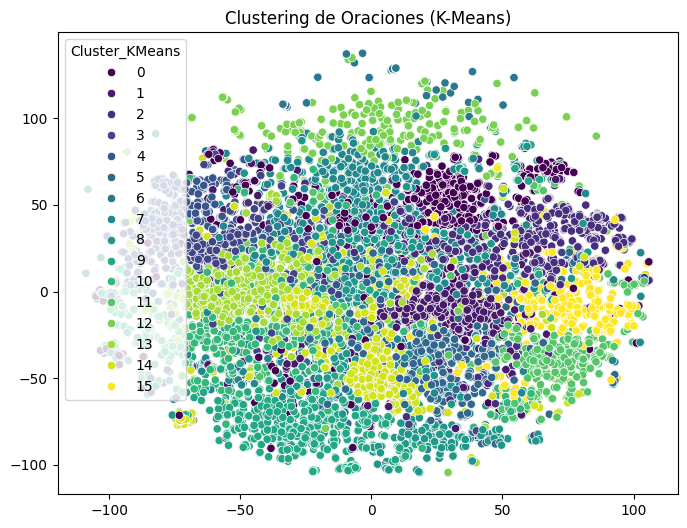

{'ID': 4, 'Oracion_ID': '993', 'Oracion': 'eficiencia energético implementar política eficiencia energético sector clave industria transporte construcción promover uso tecnología reducir consumo energía', 'Temas Clave': 'energía, transporte, ciencia, tecnología, política, industria', 'Partido': 'MOVIMIENTO CENTRO DEMOCRÁTICO', 'CandidatoPresidente': 'JIMMY JAIRALA VALLAZZA', 'CandidatoVicePresidente': 'LUCIA VALLECILLA SUAREZ', 'ListaPolitica': '1', 'Distancia': 0.33702278, 'Cluster_KMeans': 2, 'Cluster_DBSCAN': 0}
{'ID': 14, 'Oracion_ID': '811', 'Oracion': 'además realizar campaña nacional eficiencia ahorro energético énfasis sector comercial residencial industrial institucional', 'Temas Clave': 'industria, ciencia', 'Partido': 'PARTIDO AVANZA', 'CandidatoPresidente': 'LUIS FELIPE TILLERIA', 'CandidatoVicePresidente': 'KARLA PAULINA ROSERO', 'ListaPolitica': '8', 'Distancia': 0.38165388, 'Cluster_KMeans': 2, 'Cluster_DBSCAN': 0}
{'ID': 14, 'Oracion_ID': '827', 'Oracion': 'campaña naci

In [4]:
import pandas as pd
import numpy as np
import torch
from sentence_transformers import SentenceTransformer
import faiss
import pickle
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# 📌 1. Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# 📌 2. Verificar si hay GPU disponible
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 📌 3. Cargar los archivos CSV
df = pd.read_csv('oraciones_procesadas_completo.csv', delimiter=';')

# 📌 4. Inicializar el modelo BERT y moverlo a GPU si está disponible
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2', device=device)

# 📌 5. Crear embeddings para todas las oraciones
embeddings = model.encode(df['Oracion'].tolist(), show_progress_bar=True, device=device)
embeddings = np.array(embeddings).astype('float32')  # No reducimos dimensiones

# 📌 6. Crear un índice FAISS
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)

# 📌 7. Guardar los embeddings e índice FAISS
np.save('embeddings.npy', embeddings)
faiss.write_index(index, 'faiss_index.index')

# 📌 8. Guardar datos procesados en un archivo pickle
with open('sentences2.pkl', 'wb') as f:
    pickle.dump(df.to_dict(orient='records'), f)

print("✅ Embeddings y FAISS guardados exitosamente.")

# 📌 9. Clustering con K-Means y DBSCAN
num_clusters = 16  # Ajusta el número de clusters esperados
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["Cluster_KMeans"] = kmeans.fit_predict(embeddings)

dbscan = DBSCAN(eps=1.5, min_samples=3)  # Ajusta estos valores según los datos
df["Cluster_DBSCAN"] = dbscan.fit_predict(embeddings)

# 📌 10. Visualización con t-SNE (opcional, solo para análisis)
X_tsne = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(embeddings)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df["Cluster_KMeans"], palette="viridis", legend="full")
plt.title("Clustering de Oraciones (K-Means)")
plt.show()

# 📌 11. Cargar spaCy para español y definir preprocesamiento
nlp = spacy.load('es_core_news_sm')

def preprocess_text(text):
    tokens = word_tokenize(text.lower(), language='spanish')
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    doc = nlp(' '.join(tokens))
    return ' '.join([token.lemma_ for token in doc])

# 📌 12. Función de consulta en FAISS
def query_faiss(query, top_k=5):
    cleaned_query = preprocess_text(query)
    query_embedding = model.encode([cleaned_query], device=device).astype('float32')
    D, I = index.search(query_embedding, top_k)
    
    with open('sentences.pkl', 'rb') as f:
        sentences = pickle.load(f)
    
    results = []
    for i in range(top_k):
        result = sentences[I[0][i]]
        results.append({
            'ID': result['ID'],
            'Oracion_ID': result['Oracion_ID'],
            'Oracion': result['Oracion'],
            'Temas Clave': result['Temas Clave'],
            'Partido': result['Partido'],
            'CandidatoPresidente': result['CandidatoPresidente'],
            'CandidatoVicePresidente': result['CandidatoVicePresidente'],
            'ListaPolitica': result['ListaPolitica'],
            'Distancia': D[0][i],
            'Cluster_KMeans': df.iloc[I[0][i]]["Cluster_KMeans"],  # Agregar info del cluster
            'Cluster_DBSCAN': df.iloc[I[0][i]]["Cluster_DBSCAN"]
             })
    return results

# 📌 13. Ejemplo de consulta
query = "¿Cómo mejorar la eficiencia energética en la industria?"
results = query_faiss(query)

for res in results:
    print(res)


In [17]:
import pickle
import pandas as pd

# Cargar el DataFrame del primer CSV (por ejemplo, que contiene la columna 'embedding_Oracion')
with open('oraciones_con_embeddings_completo.pkl', 'rb') as f:
    df1 = pickle.load(f)

# Cargar el DataFrame del segundo CSV (por ejemplo, que contiene la columna 'embedding_oracion_sinStopWords')
with open('./data/interview/elecciones_oraciones_con_embeddings.pkl', 'rb') as f:
    df2 = pickle.load(f)

# Verificar la carga
print("Primeras filas del primer DataFrame:")
print(df1.head())
print("\nPrimeras filas del segundo DataFrame:")
print(df2.head())


Primeras filas del primer DataFrame:
   ID Oracion_ID                                            Oracion  \
0   1          1  objetivo general alcanzar buen vivir democraci...   
1   1          2                       objetivo específico objetivo   
2   1          3                       justicia buen vivir objetivo   
3   1          4     justicia alcanzar paz seguridad orden objetivo   
4   1          5  justicia bienestar económico igualdad oportuni...   

                               Temas Clave                      Partido  \
0  democracia, política, justicia, cultura  REVOLUCIÓN CIUDADANA - RETO   
1                                      NaN  REVOLUCIÓN CIUDADANA - RETO   
2                                 justicia  REVOLUCIÓN CIUDADANA - RETO   
3                      justicia, seguridad  REVOLUCIÓN CIUDADANA - RETO   
4                       justicia, igualdad  REVOLUCIÓN CIUDADANA - RETO   

  CandidatoPresidente CandidatoVicePresidente ListaPolitica  \
0      LUISA GONZALEZ 

In [18]:
import numpy as np
import faiss

# --- Para el primer DataFrame ---
# Extraer y apilar los embeddings
embeddings1 = np.vstack(df1['embedding_Oracion'].values).astype('float32')
dim1 = embeddings1.shape[1]

# Crear el índice FAISS (usamos IndexFlatL2 para búsqueda por distancia euclidiana)
index1 = faiss.IndexFlatL2(dim1)
index1.add(embeddings1)
print(f"El índice FAISS del primer DataFrame contiene {index1.ntotal} vectores.")

# --- Para el segundo DataFrame ---
# Extraer y apilar los embeddings
embeddings2 = np.vstack(df2['embedding_oracion_sinStopWords'].values).astype('float32')
dim2 = embeddings2.shape[1]

# Crear el índice FAISS para el segundo conjunto de embeddings
index2 = faiss.IndexFlatL2(dim2)
index2.add(embeddings2)
print(f"El índice FAISS del segundo DataFrame contiene {index2.ntotal} vectores.")

# Guardar el índice del primer DataFrame
faiss.write_index(index1, 'faiss_index_oraciones_procesadas.index')
print("Índice FAISS del primer DataFrame guardado en 'faiss_index_oraciones_procesadas.index'.")

# Guardar el índice del segundo DataFrame
faiss.write_index(index2, 'faiss_index_elecciones_oraciones.index')
print("Índice FAISS del segundo DataFrame guardado en 'faiss_index_elecciones_oraciones.index'.")


El índice FAISS del primer DataFrame contiene 13759 vectores.
El índice FAISS del segundo DataFrame contiene 7753 vectores.
Índice FAISS del primer DataFrame guardado en 'faiss_index_oraciones_procesadas.index'.
Índice FAISS del segundo DataFrame guardado en 'faiss_index_elecciones_oraciones.index'.


In [4]:
import pickle
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
import faiss

# Cargar el tokenizador y el modelo BERT (usa el mismo que usaste para generar los embeddings)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def obtener_embedding(texto):
    """
    Dada una cadena de texto, devuelve el embedding correspondiente usando BERT.
    Se utiliza el embedding del token [CLS] como representación.
    """
    texto = str(texto)  # asegurar que sea string
    inputs = tokenizer(texto, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Se toma el embedding del token [CLS] (posición 0) y se aplana a 1D (768,)
    embedding = outputs.last_hidden_state[:, 0, :].numpy().flatten()
    return embedding

# ---------------------------------------------------------------------------
# 1. Cargar los DataFrames con embeddings desde los archivos .pkl
# ---------------------------------------------------------------------------
# Ejemplo para el primer CSV (ajusta el nombre del archivo según corresponda)
with open('oraciones_con_embeddings_completo.pkl', 'rb') as f:
    df1 = pickle.load(f)
    
# Ejemplo para el segundo CSV
with open('./data/interview/elecciones_oraciones_con_embeddings.pkl', 'rb') as f:
    df2 = pickle.load(f)

# ---------------------------------------------------------------------------
# 2. Reconstruir los índices FAISS a partir de los embeddings almacenados en los DataFrames
# ---------------------------------------------------------------------------
def construir_index_faiss(df, embedding_col):
    """
    Dado un DataFrame y el nombre de la columna que contiene los embeddings,
    crea y devuelve un índice FAISS usando IndexFlatL2.
    """
    # Extraer y apilar los embeddings en una matriz NumPy de tipo float32
    embeddings_matrix = np.vstack(df[embedding_col].values).astype('float32')
    dim = embeddings_matrix.shape[1]
    index = faiss.IndexFlatL2(dim)
    index.add(embeddings_matrix)
    print(f"Se agregaron {index.ntotal} vectores al índice FAISS.")
    return index

# Para el primer DataFrame, asumimos que la columna de embeddings se llama 'embedding_Oracion'
index1 = construir_index_faiss(df1, 'embedding_Oracion')

# Para el segundo DataFrame, asumimos que la columna de embeddings se llama 'embedding_oracion_sinStopWords'
index2 = construir_index_faiss(df2, 'embedding_oracion_sinStopWords')

# ---------------------------------------------------------------------------
# 3. Función para hacer consultas en un índice FAISS
# ---------------------------------------------------------------------------
def hacer_consulta(index, df, query_text, k=5):
    """
    Dada una consulta en forma de texto:
      - Calcula su embedding.
      - Busca los k vecinos más cercanos en el índice FAISS.
      - Recupera y muestra la metadata de los registros encontrados.
    
    Parámetros:
      index: Índice FAISS.
      df: DataFrame original con la metadata, donde el orden coincide con el índice.
      query_text: Texto de consulta.
      k: Número de vecinos a recuperar.
    """
    # Obtener el embedding de la consulta y asegurarse de que sea float32
    embedding_query = obtener_embedding(query_text).astype('float32')
    # Expandir dimensiones para que sea (1, dim)
    query_vector = np.expand_dims(embedding_query, axis=0)
    
    # Buscar en el índice
    distances, indices = index.search(query_vector, k)
    
    # Mostrar resultados
    print(f"\nConsulta: \"{query_text}\"")
    print("Indices encontrados:", indices[0])
    print("Distancias:", distances[0])
    print("\nResultados:")
    # Se asume que el DataFrame tiene la metadata deseada en las columnas originales.
    # Por ejemplo, para df1 se podrían mostrar 'Oracion', 'CandidatoPresidente', etc.
    resultados = df.iloc[indices[0]]
    print(resultados)
    return distances, indices

# ---------------------------------------------------------------------------
# 4. Ejemplo de consulta
# ---------------------------------------------------------------------------
# Consulta en el primer índice (df1) usando la columna 'embedding_Oracion'
query_text1 = "eduacion"
print("\n--- Consulta en el primer índice (df1) ---")
_ = hacer_consulta(index1, df1, query_text1, k=5)

# Consulta en el segundo índice (df2) usando la columna 'embedding_oracion_sinStopWords'
query_text2 = "bajar iva."
print("\n--- Consulta en el segundo índice (df2) ---")
_ = hacer_consulta(index2, df2, query_text2, k=5)


Se agregaron 13759 vectores al índice FAISS.
Se agregaron 7753 vectores al índice FAISS.

--- Consulta en el primer índice (df1) ---

Consulta: "eduacion"
Indices encontrados: [ 4651  4647  8323  8647 12534]
Distancias: [12.340698 13.612962 13.612962 13.612962 13.612962]

Resultados:
       ID Oracion_ID         Oracion Temas Clave  \
4651    3       1499  concienciación     ciencia   
4647    3       1495       educación   educación   
8323    7        510       educación   educación   
8647    7        938       educación   educación   
12534  14        586       educación   educación   

                                                 Partido  \
4651                       PARTIDO IZQUIERDA DEMOCRÁTICA   
4647                       PARTIDO IZQUIERDA DEMOCRÁTICA   
8323   MOVIMIENTO AMIGO, ACCIÓN MOVILIZADORA INDEPEND...   
8647   MOVIMIENTO AMIGO, ACCIÓN MOVILIZADORA INDEPEND...   
12534                                     PARTIDO AVANZA   

        CandidatoPresidente   CandidatoVi

In [28]:
import unicodedata
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
import faiss
import numpy as np

# Cargar el archivo CSV con el delimitador ';'
df = pd.read_csv('candidatos.csv', delimiter=';')

# Cargar el modelo BERT y su tokenizer (en este ejemplo se usa 'bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Función para normalizar texto: convierte a minúsculas y elimina acentos
def normalizar_texto(texto):
    texto = texto.lower()
    texto = unicodedata.normalize('NFD', texto)
    texto = ''.join([c for c in texto if unicodedata.category(c) != 'Mn'])
    return texto

# Función para obtener el embedding de un texto usando BERT.
# Se utiliza el promedio de la última capa (puedes ajustar esta estrategia si lo deseas)
def obtener_embedding(texto):
    inputs = tokenizer(texto, return_tensors='pt', padding=True, truncation=True, max_length=64)
    with torch.no_grad():
        outputs = model(**inputs)
    # Promediamos los embeddings de la secuencia (alternativamente se podría usar el token [CLS])
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Construir la lista de entradas de candidatos a partir de las dos columnas:
# Se generan entradas separadas para cada candidato, indicando si es presidente o vice,
# y se asocia el correspondiente valor de "Whois"
candidatos = []
for idx, row in df.iterrows():
    # Si existe un candidato presidente, se agrega una entrada
    if pd.notna(row['CandidatoPresidente']):
        entry = {
            'nombre': row['CandidatoPresidente'],
            'tipo': 'presidente',
            'whois': row['WhoisPresident']
        }
        candidatos.append(entry)
    # Si existe un candidato vicepresidente, se agrega otra entrada
    if pd.notna(row['CandidatoVicePresidente']):
        entry = {
            'nombre': row['CandidatoVicePresidente'],
            'tipo': 'vice',
            'whois': row['WhoisVice']
        }
        candidatos.append(entry)

# Generar los embeddings para cada candidato (usando el nombre normalizado)
embeddings = []
for entry in candidatos:
    nombre_normalizado = normalizar_texto(entry['nombre'])
    emb = obtener_embedding(nombre_normalizado)
    embeddings.append(emb)
embeddings = np.array(embeddings).astype('float32')

# Crear el índice FAISS utilizando la métrica L2 para búsquedas por similitud
d = embeddings.shape[1]  # Dimensionalidad del embedding
index = faiss.IndexFlatL2(d)
index.add(embeddings)

def buscar_candidato_por_similitud(query_text):
    # Convertir la consulta a minúsculas y remover palabras comunes ("quién", "quien", "es")
    query_lower = query_text.lower()
    for palabra in ["quién", "quien", "es"]:
        query_lower = query_lower.replace(palabra, "")
    candidate_query = query_lower.strip()
    
    # Normalizar el texto extraído
    normalized_candidate_query = normalizar_texto(candidate_query)
    
    # Obtener el embedding de la consulta
    embedding_query = obtener_embedding(normalized_candidate_query)
    embedding_query = np.array([embedding_query]).astype('float32')
    
    # Buscar el candidato más cercano en el índice FAISS
    D, I = index.search(embedding_query, 1)
    
    # Mostrar información de depuración
    print("Distancia obtenida:", D[0][0])
    print("Índice en el índice FAISS:", I[0][0])
    
    # Obtener el candidato encontrado
    candidato_encontrado = candidatos[I[0][0]]
    print("Candidato encontrado:", candidato_encontrado)
    return candidato_encontrado['whois']

# Función principal para procesar la consulta
def hacer_consulta(query_text):
    if "quién" in query_text.lower() or "quien" in query_text.lower():
        resultado = buscar_candidato_por_similitud(query_text)  # Llamada sin 'umbral'
        print("Resultado:", resultado)
        return resultado
    else:
        print("Consulta no válida.")
        return "Consulta no válida."

# Ejemplo de consulta
query_text = "quién es CARLOS "
print("\n--- Consulta ---")
hacer_consulta(query_text)



--- Consulta ---
Distancia obtenida: 32.213364
Índice en el índice FAISS: 18
Candidato encontrado: {'nombre': 'ANDREA GONZALEZ', 'tipo': 'presidente', 'whois': 'Andrea González Nader es una activista medioambiental y política ecuatoriana de 37 años, originaria de Guayaquil. Ha trabajado como profesora en instituciones educativas como los colegios Delta-Torremar, Cruz del Sur y la Unidad Educativa Bilingüe Delta entre 2007 y 2015. Además, ha colaborado con organizaciones medioambientales como la Fundación La Iguana y ha liderado proyectos de paisajismo sostenible y manejo integral de desechos. En 2023, fue candidata a la vicepresidencia de la República junto al periodista Fernando Villavicencio, y posteriormente acompañó al periodista Christian Zurita en el mismo proceso electoral. En agosto de 2024, fue proclamada candidata presidencial por el Partido Sociedad Patriótica (PSP) para las elecciones de 2025.'}
Resultado: Andrea González Nader es una activista medioambiental y política ec

'Andrea González Nader es una activista medioambiental y política ecuatoriana de 37 años, originaria de Guayaquil. Ha trabajado como profesora en instituciones educativas como los colegios Delta-Torremar, Cruz del Sur y la Unidad Educativa Bilingüe Delta entre 2007 y 2015. Además, ha colaborado con organizaciones medioambientales como la Fundación La Iguana y ha liderado proyectos de paisajismo sostenible y manejo integral de desechos. En 2023, fue candidata a la vicepresidencia de la República junto al periodista Fernando Villavicencio, y posteriormente acompañó al periodista Christian Zurita en el mismo proceso electoral. En agosto de 2024, fue proclamada candidata presidencial por el Partido Sociedad Patriótica (PSP) para las elecciones de 2025.'

In [29]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
import pickle

# Cargar el archivo CSV
df = pd.read_csv("candidatos.csv", delimiter=";")

# Inicializar el tokenizador y el modelo de BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Función para obtener embeddings de BERT
def get_bert_embeddings(text):
    # Tokenizar el texto
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    
    # Obtener las salidas del modelo
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Tomar la representación del token [CLS] (primer token) como el embedding del texto
    embedding = outputs.last_hidden_state[:, 0, :].squeeze()
    
    return embedding.numpy()

# Generar embeddings para las columnas de CandidatoPresidente y CandidatoVicePresidente
presidente_embeddings = df["CandidatoPresidente"].apply(get_bert_embeddings)
vicepresidente_embeddings = df["CandidatoVicePresidente"].apply(get_bert_embeddings)

# Guardar los embeddings en un archivo pickle
with open("candidatos_embeddings.pkl", "wb") as f:
    pickle.dump({
        "presidente_embeddings": presidente_embeddings.tolist(),
        "vicepresidente_embeddings": vicepresidente_embeddings.tolist()
    }, f)

print("Embeddings guardados en 'candidatos_embeddings.pkl'")


Embeddings guardados en 'candidatos_embeddings.pkl'


# clustering kmean

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
import pickle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 1. Cargar el archivo CSV
df = pd.read_csv("candidatos.csv", delimiter=";")

# 📌 2. Inicializar el modelo y tokenizador BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# 📌 3. Función para obtener embeddings de BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()

# 📌 4. Generar embeddings para los candidatos
df["presidente_embedding"] = df["CandidatoPresidente"].apply(get_bert_embeddings)
df["vicepresidente_embedding"] = df["CandidatoVicePresidente"].apply(get_bert_embeddings)

# Convertir listas de embeddings a arrays NumPy
presidente_embeddings = np.stack(df["presidente_embedding"].values)
vicepresidente_embeddings = np.stack(df["vicepresidente_embedding"].values)

# Concatenar embeddings de presidente y vicepresidente
X = np.hstack((presidente_embeddings, vicepresidente_embeddings))

# 📌 6. Aplicar clustering con K-Means
num_clusters = 5  # Cambia esto según el número de grupos esperados
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["Cluster_KMeans"] = kmeans.fit_predict(X_reduced)

# 📌 7. Aplicar clustering con DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=3)  # Ajusta estos valores según los datos
df["Cluster_DBSCAN"] = dbscan.fit_predict(X_reduced)

# 📌 8. Reducir a 2D para visualizar con t-SNE
X_tsne = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(X_reduced)

# 📌 9. Visualizar resultados con t-SNE y K-Means
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df["Cluster_KMeans"], palette="viridis", legend="full")
plt.title("Clustering de Candidatos (K-Means)")
plt.show()

# 📌 10. Guardar los embeddings y clusters en un archivo
with open("candidatos_embeddings.pkl", "wb") as f:
    pickle.dump({
        "presidente_embeddings": presidente_embeddings.tolist(),
        "vicepresidente_embeddings": vicepresidente_embeddings.tolist(),
        "clusters_kmeans": df["Cluster_KMeans"].tolist(),
        "clusters_dbscan": df["Cluster_DBSCAN"].tolist()
    }, f)

print("✅ Proceso completado. Embeddings y clusters guardados en 'candidatos_embeddings.pkl'")


ValueError: n_components=50 must be between 0 and min(n_samples, n_features)=16 with svd_solver='full'

In [2]:
import pickle
import faiss
import numpy as np
import pandas as pd
import re  # Para usar expresiones regulares y limpiar la consulta
from transformers import BertTokenizer, BertModel
import torch

# Cargar los datos desde el CSV
df = pd.read_csv("candidatos.csv", delimiter=";")

# Cargar el modelo BERT y el tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Función para obtener los embeddings de BERT
def get_bert_embeddings(texto):
    # Tokenizar el texto
    inputs = tokenizer(texto, return_tensors='pt', truncation=True, padding=True, max_length=512)
    
    # Obtener la salida del modelo BERT
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Obtener el embedding correspondiente a la última capa (pooling)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    
    return embeddings

# Función para normalizar los embeddings
def normalizar_embeddings(embeddings):
    return embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

# Suponiendo que ya tienes las funciones para obtener los embeddings
presidente_embeddings = np.array([get_bert_embeddings(nombre).flatten() for nombre in df["CandidatoPresidente"]])
vicepresidente_embeddings = np.array([get_bert_embeddings(nombre).flatten() for nombre in df["CandidatoVicePresidente"]])

# Normalizar los embeddings
presidente_embeddings = normalizar_embeddings(presidente_embeddings)
vicepresidente_embeddings = normalizar_embeddings(vicepresidente_embeddings)

# Concatenar los embeddings de presidente y vicepresidente
all_embeddings = np.concatenate([presidente_embeddings, vicepresidente_embeddings], axis=0)

# Crear un índice FAISS
dimension = all_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(all_embeddings.astype(np.float32))

# Función de búsqueda y verificación de "quién" + nombre
def buscar_similares(nuevo_texto, k=1):  # Solo devolver el top 1
    nuevo_texto = nuevo_texto.upper()  # Convertir la consulta a mayúsculas
    print(f"Consultando: {nuevo_texto}")
    
    # Comprobar si la consulta contiene "quién" y un nombre
    if "QUIÉN" in nuevo_texto:
        # Limpiar la consulta para extraer solo el nombre del candidato
        nombre = re.sub(r'[^A-Za-z\s]', '', nuevo_texto.replace("QUIÉN", "").strip())  # Remover caracteres no alfabéticos
        nombre = nombre.strip()  # Eliminar espacios adicionales
        print(f"Nombre extraído para búsqueda: {nombre}")
        
        # Realizar búsqueda para presidente y vicepresidente
        # Primero buscamos el presidente
        distancias_presidente, indices_presidente = index.search(get_bert_embeddings(nombre).reshape(1, -1).astype(np.float32), k)
        distancias_presidente, indices_presidente = zip(*sorted(zip(distancias_presidente[0], indices_presidente[0]), key=lambda x: x[0]))

        # Si encontramos una coincidencia con el presidente, lo devolvemos
        for i, (distancia, indice) in enumerate(zip(distancias_presidente, indices_presidente)):
            if indice < len(presidente_embeddings):  # Si es presidente
                candidato = df['CandidatoPresidente'].iloc[indice]
                print(f"Resultado: Candidato Presidente: {candidato} (Distancia: {distancia})")
                print(f"Quien es: {df['WhoisPresident'].iloc[indice]}")
                return
            else:
                # Si no es presidente, lo buscamos en vicepresidente
                indice_vice = indice - len(presidente_embeddings)
                candidato = df['CandidatoVicePresidente'].iloc[indice_vice]
                print(f"Resultado: Candidato Vicepresidente: {candidato} (Distancia: {distancia})")
                print(f"Quien es: {df['WhoisVice'].iloc[indice_vice]}")
                return
    else:
        print("No se encontró la palabra 'quién' en la consulta.")

# Ejemplo de consulta con "quién"
consulta = "Quién es LUISA GONZALEZ?"
buscar_similares(consulta)


Consultando: QUIÉN ES LUISA GONZALEZ?
Nombre extraído para búsqueda: ES LUISA GONZALEZ
Resultado: Candidato Presidente: LUISA GONZALEZ (Distancia: 56.31492614746094)
Quien es: LUISA GONZALEZ nacida en Quito en 1977, Luisa González se considera manabita, ya que creció en la parroquia Canuto de Chone, Manabí. Es abogada y ha desempeñado diversos cargos en la función pública durante el gobierno de Rafael Correa. Entre sus roles más destacados se incluyen: Asesora de la Secretaría de Comunicación e Información en 2008.Coordinadora General de Recursos Humanos en la Superintendencia de Compañías.Cónsul General de Ecuador en Madrid y Alicante.Viceministra de Gestión Turística en el Ministerio de Turismo.Secretaria General de la Presidencia.En 2021, fue elegida asambleísta por la provincia de Manabí. Durante su gestión, se opuso a la despenalización del aborto en casos de violación y a la Ley de Salud e Higiene Menstrual. En 2023, fue candidata presidencial, pero perdió ante Daniel Noboa. En 2

In [ ]:
# Imprimir la cantidad total de elementos en el índice FAISS
print("Total de elementos en el índice FAISS:", index.ntotal)

# Iterar sobre cada elemento en el índice y mostrar su contenido
for i in range(index.ntotal):
    # Reconstruir el vector almacenado en el índice para el ítem i
    vector_reconstruido = index.reconstruct(i)
    
    # Mostrar el índice, la información del candidato y (opcionalmente) el vector
    print(f"\nÍndice {i}:")
    print("Información del candidato:", candidatos[i])
    print("Embedding (vector):", vector_reconstruido)


Ollama

In [1]:
import pickle
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
import faiss

# Para preprocesamiento
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy

# Descargar recursos de NLTK (si aún no se han descargado)
nltk.download('punkt')
nltk.download('stopwords')

# Cargar el modelo spaCy para español (asegúrate de tener instalado "es_core_news_sm")
nlp = spacy.load('es_core_news_sm')

# Cargar el tokenizador y el modelo BERT (para obtener embeddings)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def obtener_embedding(texto):
    """
    Dada una cadena de texto, devuelve el embedding correspondiente usando BERT.
    Se utiliza el embedding del token [CLS] como representación.
    """
    texto = str(texto)  # asegurar que sea string
    inputs = tokenizer(texto, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Se toma el embedding del token [CLS] (posición 0) y se aplana a un vector 1D (768,)
    embedding = outputs.last_hidden_state[:, 0, :].numpy().flatten()
    return embedding

# ---------------------------------------------------------------------------
# 1. Cargar los DataFrames con embeddings desde los archivos .pkl
# ---------------------------------------------------------------------------
with open('oraciones_con_embeddings_completo.pkl', 'rb') as f:
    df1 = pickle.load(f)
    
with open('./data/interview/elecciones_oraciones_con_embeddings.pkl', 'rb') as f:
    df2 = pickle.load(f)

# ---------------------------------------------------------------------------
# 2. Reconstruir los índices FAISS a partir de los embeddings almacenados en los DataFrames
# ---------------------------------------------------------------------------
def construir_index_faiss(df, embedding_col):
    """
    Dado un DataFrame y el nombre de la columna que contiene los embeddings,
    crea y devuelve un índice FAISS usando IndexFlatL2.
    """
    embeddings_matrix = np.vstack(df[embedding_col].values).astype('float32')
    dim = embeddings_matrix.shape[1]
    index = faiss.IndexFlatL2(dim)
    index.add(embeddings_matrix)
    print(f"Se agregaron {index.ntotal} vectores al índice FAISS.")
    return index

# Se asume que en df1 la columna de embeddings se llama 'embedding_Oracion'
index1 = construir_index_faiss(df1, 'embedding_Oracion')

# Se asume que en df2 la columna de embeddings se llama 'embedding_oracion_sinStopWords'
index2 = construir_index_faiss(df2, 'embedding_oracion_sinStopWords')

# ---------------------------------------------------------------------------
# 3. Función para preprocesar la consulta
# ---------------------------------------------------------------------------
def preprocess_query(query):
    """
    Preprocesa la consulta:
      - Pasa a minúsculas.
      - Tokeniza el texto en español.
      - Elimina tokens que no sean alfabéticos y las stopwords en español.
      - Lematiza el texto usando spaCy.
    """
    tokens = word_tokenize(query.lower(), language='spanish')
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    doc = nlp(' '.join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    cleaned_query = ' '.join(lemmatized_tokens)
    print(f"Consulta preprocesada: {cleaned_query}")
    return cleaned_query

# ---------------------------------------------------------------------------
# 4. Función para hacer la consulta en ambos índices y usar Ollama para generar una respuesta
# ---------------------------------------------------------------------------
def query_faiss_ollama(query_text, k=5, n_top=5):
    """
    Preprocesa la consulta, obtiene su embedding y la consulta en dos índices FAISS.
    Combina los resultados, ordena por similitud (menor distancia) y toma solo los n_top más similares.
    Luego construye un prompt para enviar a Ollama.
    
    Parámetros:
      - query_text: texto de consulta.
      - k: número de vecinos a recuperar en cada índice.
      - n_top: número final de resultados (combinados de ambos índices) a utilizar.
    """
    # Preprocesar la consulta
    cleaned_query = preprocess_query(query_text)
    
    # Generar el embedding para la consulta (asegúrate de que sea float32)
    query_embedding = obtener_embedding(cleaned_query).astype('float32')
    query_vector = np.expand_dims(query_embedding, axis=0)
    
    # Buscar en el primer índice (df1)
    distances1, indices1 = index1.search(query_vector, k)
    # Buscar en el segundo índice (df2)
    distances2, indices2 = index2.search(query_vector, k)
    
    # Combinar resultados de ambos índices junto con sus distancias
    resultados_con_dist = []
    
    # Procesar resultados del primer índice (df1)
    for idx, dist in zip(indices1[0], distances1[0]):
        fila = df1.iloc[idx]
        # Se asume que df1 tiene una columna "Oracion" para la oración original
        resultado = (
            f"oracion_plan: {fila['Oracion']}, "
            f"Temas clave: {fila['Temas Clave']}, "
            f"Partido: {fila['Partido']}, "
            f"Candidato Presidente: {fila['ListaPolitica']}, "
            f"Candidato Vicepresidente: {fila['CandidatoPresidente']}"
        )
        resultados_con_dist.append((dist, resultado))
    
    # Procesar resultados del segundo índice (df2)
    for idx, dist in zip(indices2[0], distances2[0]):
        fila = df2.iloc[idx]
        # Se asume que df2 tiene una columna "oracion_original" para la oración original
        resultado = (
            f"oracion_entrevista: {fila['oracion_original']}, "
            f"Partido: {fila['Partido']}, "
            f"Candidato Presidente: {fila['presidente']}, "
            f"Candidato Vicepresidente: {fila['vicepresidente']}"
        )
        resultados_con_dist.append((dist, resultado))
    
    # Ordenar los resultados combinados por distancia (la menor distancia indica mayor similitud)
    resultados_con_dist.sort(key=lambda x: x[0])
    
    # Tomar solo los n_top resultados con mayor similitud
    resultados_finales = [resultado for _, resultado in resultados_con_dist[:n_top]]
    
    # Construir el prompt para enviar a Ollama
    prompt = (
        "Esto es lo que he encontrado.:\n\n" +
        "\n".join(resultados_finales) +
        "\n\nGenera un resumen basado en estos resultados."
    )
    print("\nPrompt para Ollama:")
    print(prompt)
    
    # Llamar a Ollama (asegúrate de tener la librería 'ollama' instalada y configurada)
    import ollama
    respuesta = ollama.chat(model='llama3.2:latest', messages=[{'role': 'user', 'content': prompt}])
    return respuesta['message']['content']

# ---------------------------------------------------------------------------
# Ejemplo de consulta
# ---------------------------------------------------------------------------
query_text = "bajar el iva para fortalecer la economia"
print("\n--- Realizando consulta en ambos índices ---")
# En este ejemplo, se buscan 50 vecinos en cada índice, pero se usarán solo los 5 resultados
respuesta_ollama = query_faiss_ollama(query_text, k=50, n_top=50)
print("\nRespuesta de Ollama:")
print(respuesta_ollama)
print("\n--- Realizando consulta con el segundo ---")
query_text2 = "Luisa Gonzalez"
respuesta_ollama=query_faiss_ollama(query_text2,k=10,n_top=50)

KeyboardInterrupt: 

In [12]:
import pandas as pd
import numpy as np
import torch
from sentence_transformers import SentenceTransformer
import faiss
import pickle
import nltk
import spacy
import ollama
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Verificar si hay GPU disponible
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Cargar el archivo CSV con las oraciones procesadas
df = pd.read_csv('oraciones.csv', delimiter=';')

# Inicializar el modelo BERT preentrenado y moverlo a la GPU si está disponible
model = SentenceTransformer('paraphrase-distilroberta-base-v1', device=device)

# Cargar el índice FAISS previamente guardado
index = faiss.read_index('faiss_index.index')

# Cargar los datos de oraciones desde sentences2.pkl
with open('sentences2.pkl', 'rb') as f:
    sentences = pickle.load(f)

# Cargar el modelo de spaCy para lematización en español
nlp = spacy.load('es_core_news_sm')

# Función para preprocesar el texto
def preprocess_text(text):
    tokens = word_tokenize(text.lower(), language='spanish')
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    doc = nlp(' '.join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_tokens)

# Función para obtener la oración original desde el CSV usando Oracion_ID
def get_oracion_by_id(oracion_id):
    oracion_row = df[df['Oracion_ID'] == oracion_id]
    if not oracion_row.empty:
        return oracion_row.iloc[0]['Oracion']
    return None

# Función principal para buscar en FAISS y generar respuesta con Ollama
def query_faiss_ollama(query, top_k=50):  
    torch.set_grad_enabled(False)  
    cleaned_query = preprocess_text(query)
    print(f"Consulta procesada: {cleaned_query}")

    # Generar el embedding de la consulta
    query_embedding = model.encode([query], device=device).astype('float16')

    # Buscar en el índice FAISS
    D, I = index.search(query_embedding, top_k)

    resultados = []
    print("\n🔍 Resultados encontrados en FAISS:\n")
    
    for i in range(top_k):
        match = sentences[I[0][i]]
        
        oracion_id = match['Oracion_ID']
        oracion_original = get_oracion_by_id(oracion_id)

        # Extraer los datos directamente desde el pickle
        partido = match.get('Partido', 'Desconocido')
        candidato_presidente = match.get('CandidatoPresidente', 'Desconocido')
        candidato_vicepresidente = match.get('CandidatoVicePresidente', 'Desconocido')
        lista_politica = match.get('ListaPolitica', 'Desconocida')

        if oracion_original:
            resultado = (
                f"Oración: {oracion_original}, "
                f"Partido: {partido}, "
                f"Presidente: {candidato_presidente}, "
                f"Vicepresidente: {candidato_vicepresidente}, "
                f"Lista Política: {lista_politica}"
            )
            resultados.append(resultado)
            print(f"{i+1}. {resultado}")  # Mostrar cada resultado encontrado
        
    if not resultados:
        return "No se encontraron oraciones relevantes para la consulta."

    # Crear el prompt para Ollama
    prompt = f"Esto es lo que he encontrado:\n\n" + "\n".join(resultados) + "\n\nGenera un resumen clasificado por partido y explícalo."

    # Generar respuesta con Ollama en modo streaming
    response_chunks = []  # Lista para acumular los "chunks" de la respuesta

    # Usar streaming
    for chunk in ollama.chat(model='llama3.2-vision:latest', 
                             messages=[{'role': 'user', 'content': prompt}], 
                             stream=True):
        # Almacenar el contenido del chunk sin repetirlo
        content = chunk['message']['content']
        
        # Solo agregar nuevo contenido si no es igual al contenido previo
        if len(response_chunks) == 0 or content != response_chunks[-1]:
            response_chunks.append(content)
            print(content, end='', flush=True)  # Mostrar el contenido mientras se genera

    # Devolver la respuesta completa al finalizar
    return ''.join(response_chunks)

# Ejemplo de consulta
query = "en economía, qué ofrecen los candidatos"
respuesta = query_faiss_ollama(query)
print(respuesta)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Consulta procesada: economía ofrecer candidato

🔍 Resultados encontrados en FAISS:

1. Oración: desarrollar leyes y políticas que incorporen perspectivas epistemológicas del sur plurinacionales e interculturales en la toma de decisiones y en la administración de justicia asegurando que reflejen los valores y las necesidades de los pueblos y nacionalidades indígenas afrodescendientes montubios y otros, Partido: REVOLUCIÓN CIUDADANA - RETO, Presidente: LUISA GONZALEZ, Vicepresidente: DIEGO BORJA, Lista Política: 5-33
2. Oración: estas diferencias limitan el potencial de desarrollo del país y perpetúan la desigualdad social haciendo necesaria una intervención educativa que priorice la equidad en el acceso y la calidad de la educación para todos los ecuatorianos, Partido: MOVIMIENTO CREO, CREANDO OPORTUNIDADES, Presidente: FRANCESCO TABACCHI, Vicepresidente: BLANCA SACANCELA, Lista Política: 21
3. Oración: promover la participación ciudadana en la formulación de políticas de seguridad así 

In [ ]:
import pandas as pd
import numpy as np
import torch
from sentence_transformers import SentenceTransformer
import faiss
import pickle
import nltk
import spacy
import ollama
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Verificar si hay GPU disponible
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Cargar el archivo CSV con las oraciones procesadas
df = pd.read_csv('oraciones.csv', delimiter=';')

# Inicializar el modelo BERT preentrenado y moverlo a la GPU si está disponible
model = SentenceTransformer('paraphrase-distilroberta-base-v1', device=device)

# Cargar el índice FAISS previamente guardado
index = faiss.read_index('faiss_index.index')

# Función para cargar las oraciones desde el archivo pickle según el caso
def load_sentences(pickle_file):
    with open(pickle_file, 'rb') as f:
        sentences = pickle.load(f)
    return sentences

# Elegir el archivo de pickle dependiendo del caso
# Para el primer caso (sentences2.pkl)
sentences = load_sentences('sentences2.pkl')

# Para el segundo caso (sentences3.pkl) usa este en su lugar:
# sentences = load_sentences('sentences3.pkl')

# Cargar el modelo de spaCy para lematización en español
nlp = spacy.load('es_core_news_sm')

# Función para preprocesar el texto
def preprocess_text(text):
    tokens = word_tokenize(text.lower(), language='spanish')
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    doc = nlp(' '.join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_tokens)

# Función para obtener la oración original desde el CSV usando Oracion_ID
def get_oracion_by_id(oracion_id):
    oracion_row = df[df['Oracion_ID'] == oracion_id]
    if not oracion_row.empty:
        return oracion_row.iloc[0]['Oracion']
    return None

# Función principal para buscar en FAISS y generar respuesta con Ollama
def query_faiss_ollama(query, top_k=50):  
    torch.set_grad_enabled(False)  
    cleaned_query = preprocess_text(query)
    print(f"Consulta procesada: {cleaned_query}")

    # Generar el embedding de la consulta
    query_embedding = model.encode([query], device=device).astype('float16')

    # Buscar en el índice FAISS
    D, I = index.search(query_embedding, top_k)

    resultados = []
    print("\n🔍 Resultados encontrados en FAISS:\n")
    
    for i in range(top_k):
        match = sentences[I[0][i]]
        
        oracion_id = match['Oracion_ID']
        oracion_original = get_oracion_by_id(oracion_id)

        # Extraer los datos directamente desde el pickle
        partido = match.get('Partido', 'Desconocido')
        candidato_presidente = match.get('CandidatoPresidente', 'Desconocido')
        candidato_vicepresidente = match.get('CandidatoVicePresidente', 'Desconocido')
        lista_politica = match.get('ListaPolitica', 'Desconocida')

        if oracion_original:
            resultado = (
                f"Oración: {oracion_original}, "
                f"Partido: {partido}, "
                f"Presidente: {candidato_presidente}, "
                f"Vicepresidente: {candidato_vicepresidente}, "
                f"Lista Política: {lista_politica}"
            )
            resultados.append(resultado)
            print(f"{i+1}. {resultado}")  # Mostrar cada resultado encontrado
        
    if not resultados:
        return "No se encontraron oraciones relevantes para la consulta."

    # Crear el prompt para Ollama
    prompt = f"Esto es lo que he encontrado:\n\n" + "\n".join(resultados) + "\n\nGenera un resumen clasificado por partido y explícalo."

    # Generar respuesta con Ollama en modo streaming
    response_chunks = []  # Lista para acumular los "chunks" de la respuesta

    # Usar streaming
    for chunk in ollama.chat(model='llama3.2-vision:latest', 
                             messages=[{'role': 'user', 'content': prompt}], 
                             stream=True):
        # Almacenar el contenido del chunk sin repetirlo
        content = chunk['message']['content']
        
        # Solo agregar nuevo contenido si no es igual al contenido previo
        if len(response_chunks) == 0 or content != response_chunks[-1]:
            response_chunks.append(content)
            print(content, end='', flush=True)  # Mostrar el contenido mientras se genera

    # Devolver la respuesta completa al finalizar
    return ''.join(response_chunks)

# Ejemplo de consulta
query = "en economía, qué ofrecen los candidatos"
respuesta = query_faiss_ollama(query)
print(respuesta)


In [23]:
import pickle
import faiss
import numpy as np
import pandas as pd
import re  # Para usar expresiones regulares y limpiar la consulta
from transformers import BertTokenizer, BertModel
import torch
import ollama

# Cargar los datos desde el CSV
df_candidatos = pd.read_csv("candidatos.csv", delimiter=";")
df_oraciones = pd.read_csv("oraciones.csv", delimiter=";")

# Cargar el modelo BERT y el tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Función para cargar el archivo pickle según el caso
def load_pickle_file(pickle_file):
    with open(pickle_file, 'rb') as f:
        return pickle.load(f)

# Función para obtener los embeddings de BERT
def get_bert_embeddings(texto):
    # Tokenizar el texto
    inputs = tokenizer(texto, return_tensors='pt', truncation=True, padding=True, max_length=512)
    
    # Obtener la salida del modelo BERT
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Obtener el embedding correspondiente a la última capa (pooling)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    
    return embeddings

# Función para normalizar los embeddings
def normalizar_embeddings(embeddings):
    return embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

# Cargar el índice FAISS y los embeddings de oraciones o candidatos
def cargar_indice_y_embeddings(caso):
    if caso == "oraciones":
        # Cargar el índice FAISS y las oraciones desde el archivo pickle
        index = faiss.read_index('faiss_index.index')
        sentences = load_pickle_file('sentences2.pkl')
        return index, sentences
    elif caso == "candidatos":
        # Cargar los embeddings de los candidatos desde el CSV
        presidente_embeddings = np.array([get_bert_embeddings(nombre).flatten() for nombre in df_candidatos["CandidatoPresidente"]])
        vicepresidente_embeddings = np.array([get_bert_embeddings(nombre).flatten() for nombre in df_candidatos["CandidatoVicePresidente"]])

        # Normalizar los embeddings
        presidente_embeddings = normalizar_embeddings(presidente_embeddings)
        vicepresidente_embeddings = normalizar_embeddings(vicepresidente_embeddings)

        # Concatenar los embeddings de presidente y vicepresidente
        all_embeddings = np.concatenate([presidente_embeddings, vicepresidente_embeddings], axis=0)

        # Crear un índice FAISS
        dimension = all_embeddings.shape[1]
        index = faiss.IndexFlatL2(dimension)
        index.add(all_embeddings.astype(np.float32))

        return index, df_candidatos  # Se devuelve también el dataframe de candidatos para buscar los nombres

def buscar_similares_candidatos(nuevo_texto, index, k=1):
    nuevo_texto = nuevo_texto.upper()  # Convertir la consulta a mayúsculas
    print(f"Consultando: {nuevo_texto}")
    
    # Comprobar si la consulta contiene "quién" y un nombre
    if "QUIÉN" in nuevo_texto:
        # Limpiar la consulta para extraer solo el nombre del candidato
        nombre = re.sub(r'[^A-Za-z\s]', '', nuevo_texto.replace("QUIÉN", "").strip())  # Remover caracteres no alfabéticos
        nombre = nombre.strip()  # Eliminar espacios adicionales
        print(f"Nombre extraído para búsqueda: {nombre}")
        
        # Realizar búsqueda para presidente y vicepresidente
        distancias_presidente, indices_presidente = index.search(get_bert_embeddings(nombre).reshape(1, -1).astype(np.float32), k)
        distancias_presidente, indices_presidente = zip(*sorted(zip(distancias_presidente[0], indices_presidente[0]), key=lambda x: x[0]))

        resultados = []  # Lista para almacenar los resultados
        # Si encontramos una coincidencia con el presidente, lo devolvemos
        for i, (distancia, indice) in enumerate(zip(distancias_presidente, indices_presidente)):
            if indice < len(presidente_embeddings):  # Si es presidente
                candidato = df_candidatos['CandidatoPresidente'].iloc[indice]
                resultado = f"Resultado: Candidato Presidente: {candidato} (Distancia: {distancia})"
                detalles = df_candidatos['WhoisPresident'].iloc[indice]
                resultados.append(f"{resultado} {detalles}")
            else:
                # Si no es presidente, lo buscamos en vicepresidente
                indice_vice = indice - len(presidente_embeddings)
                candidato = df_candidatos['CandidatoVicePresidente'].iloc[indice_vice]
                resultado = f"Resultado: Candidato Vicepresidente: {candidato} (Distancia: {distancia})"
                detalles = df_candidatos['WhoisVice'].iloc[indice_vice]
                resultados.append(f"{resultado} {detalles}")

        # Enviar los resultados a Ollama para generar una mejor respuesta en lenguaje natural
        if resultados:
            prompt = "Aquí están los resultados encontrados:\n" + "\n".join(resultados) + "\nPor favor, genera una respuesta clara y detallada sobre estos candidatos."
            generar_respuesta_ollama(prompt)
        else:
            print("No se encontraron resultados para el candidato.")

    else:
        print("No se encontró la palabra 'quién' en la consulta.")

# Función de búsqueda y verificación para las oraciones
def buscar_similares_oraciones(nuevo_texto, index, sentences, k=1):
    nuevo_texto = nuevo_texto.lower()  # Convertir la consulta a minúsculas
    print(f"Consultando: {nuevo_texto}")
    
    # Preprocesar la consulta
    cleaned_query = preprocess_text(nuevo_texto)
    print(f"Consulta procesada: {cleaned_query}")

    # Generar el embedding de la consulta
    query_embedding = get_bert_embeddings(nuevo_texto).astype('float16')

    # Buscar en el índice FAISS
    D, I = index.search(query_embedding.reshape(1, -1).astype(np.float32), k)

    # Mostrar los resultados encontrados
    print("\n🔍 Resultados encontrados en FAISS:\n")
    for i in range(k):
        match = sentences[I[0][i]]
        oracion_id = match['Oracion_ID']
        oracion_original = get_oracion_by_id(oracion_id)

        if oracion_original:
            print(f"{i+1}. Oración: {oracion_original}")
            generar_respuesta_ollama(f"Oración encontrada: {oracion_original}")
        else:
            print(f"{i+1}. No se encontró la oración en la base de datos.")
            generar_respuesta_ollama(f"No se encontró la oración correspondiente a la consulta.")

# Función para generar una respuesta utilizando Ollama
def generar_respuesta_ollama(prompt):
    response_chunks = []  # Lista para acumular los "chunks" de la respuesta

    # Usar Ollama para generar la respuesta en streaming
    for chunk in ollama.chat(model='llama3.2-vision:latest', 
                             messages=[{'role': 'user', 'content': prompt}], 
                             stream=True):
        # Almacenar el contenido del chunk sin repetirlo
        content = chunk['message']['content']
        
        # Solo agregar nuevo contenido si no es igual al contenido previo
        if len(response_chunks) == 0 or content != response_chunks[-1]:
            response_chunks.append(content)
            print(content, end='', flush=True)  # Mostrar el contenido mientras se genera

    # Devolver la respuesta completa al finalizar
    return ''.join(response_chunks)

# Función para obtener la oración original desde el CSV usando Oracion_ID
def get_oracion_by_id(oracion_id):
    oracion_row = df_oraciones[df_oraciones['Oracion_ID'] == oracion_id]
    if not oracion_row.empty:
        return oracion_row.iloc[0]['Oracion']
    return None

# Preprocesamiento para las oraciones
def preprocess_text(text):
    tokens = word_tokenize(text.lower(), language='spanish')
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    doc = nlp(' '.join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_tokens)

# Ejemplo de consulta con "quién" para los candidatos
consulta_candidatos = "Quién es LUISA GONZALEZ?"
index_candidatos, df_candidatos = cargar_indice_y_embeddings('candidatos')
buscar_similares_candidatos(consulta_candidatos, index_candidatos)

# Ejemplo de consulta con oraciones
consulta_oraciones = "en economía, qué ofrecen los candidatos"
index_oraciones, sentences = cargar_indice_y_embeddings('oraciones')
buscar_similares_oraciones(consulta_oraciones, index_oraciones, sentences)


Consultando: QUIÉN ES LUISA GONZALEZ?
Nombre extraído para búsqueda: ES LUISA GONZALEZ
La información proporcionada se refiere a Luisa González, quien ha sido candidata presidencial en dos ocasiones: primero en 2023 y nuevamente en 2024 para las elecciones de 2025. A continuación, te presento una respuesta detallada sobre sus antecedentes y experiencia política.

**Antecedentes personales**

Luisa González nació en Quito en el año 1977. Aunque se considera manabita, ya que creció en la parroquia Canuto de Chone, provincia de Manabí. Es abogada y ha tenido una carrera destacada en la función pública durante el gobierno de Rafael Correa.

**Experiencia política**

Entre sus cargos más destacados se incluyen:

*   Asesora de la Secretaría de Comunicación e Información (2008)
*   Coordinadora General de Recursos Humanos en la Superintendencia de Compañías
*   Cónsul General de Ecuador en Madrid y Alicante
*   Viceministra de Gestión Turística en el Ministerio de Turismo
*   Secretaria Gene